<a href="https://colab.research.google.com/github/PravinMuraliDharan/Data_Science_Capstone_Project/blob/Master/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b>Premise
-------
> 
> <b> Capstone Project : Unsupervised Learning - Clustering
> 
> Online Retail Customer Segmentation : Identify and segment the customer based on a transnational dataset.

# <b>Table of Content

---

> * <b> Premise
* <b> Problem Description
* <b> Dataset Description
* <b> Libraries
* <b> Data Wrangling
* <b> Descriptive Analytics - Exploratory Data Analysis
* <b> Unsupervised ML Analysis - Customer Segmentation
* <b> Results & Comparison
* <b> Conclusion

# <b> Problem Description

---

> <b> In this project, our task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

# <b>Dataset Description
---
> <b>Attribute Information: </b>
* **InvoiceNo**   : Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* **StockCode**   : Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* **Description** : Product (item) name. Nominal.
* **Quantity**    : The quantities of each product (item) per transaction. Numeric.
* **InvoiceDate** : Invice Date and time. Numeric, the day and time when each transaction was generated.
* **UnitPrice**   : Unit price. Numeric, Product price per unit in sterling.
* **CustomerID**  : Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* **Country**     : Country name. Nominal, the name of the country where each customer resides.



# <b> Libraries

---

> Necessary Libraries for performing analysis and implementation of Machine Learning 



In [131]:
# Libraries for Data Manipulation
import pandas as pd
import numpy as np
import datetime as dt

# Libraries for Data Visualization
import seaborn as sns
import matplotlib as plott
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.express as px

# Libraries for Missing Values Handling & Imputation
import missingno as miss_val

# Libraries for Scaling
from sklearn.preprocessing import StandardScaler

# Libraries for Machine Learning Algorithms
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

# Libraries for Accessing Algorithm
from sklearn.datasets import make_blobs
import scipy.cluster.hierarchy as sch
from sklearn import metrics
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score

# Library for Results Summarization
from prettytable import PrettyTable

# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

print('All libraries are imported Successfully :)')

All libraries are imported Successfully :)


# <b>Data Wrangling

---

> <b> It involves preparing dataset such as handling Missing Values, Data Imputation, and Data Engineering.

## <b> Importing & Loading Datasets.

In [2]:
# Mounting drive with colab notebook
from google.colab import drive
drive.mount('/content/drive')
print('Drive Mounted Sucessfully :)')

Mounted at /content/drive
Drive Mounted Sucessfully :)


In [3]:
# Reading the datasets from the drive
dir = '/content/drive/MyDrive/Colab Notebooks/AlmaBetter/2. Capstone Project/4.USVML - Segmentation/Data & Resources/Online Retail.xlsx'
retail_data = pd.read_excel(dir)
print('The dataset is successfully imported :)')

The dataset is successfully imported :)


## <b> Looking into the dataset.

In [4]:
# Looking at the size of the dataset
rows,columns = retail_data.shape
print('The Shape of Retail Dataset as follows','\nNo of Rows :',rows,'\nNo of Columns :',columns)

The Shape of Retail Dataset as follows 
No of Rows : 541909 
No of Columns : 8


In [5]:
# Looking at First 5 rows of the dataset
print('The first 5 rows are :')
retail_data.head()

The first 5 rows are :


InvoiceNo StockCode  ... CustomerID         Country
0    536365    85123A  ...    17850.0  United Kingdom
1    536365     71053  ...    17850.0  United Kingdom
2    536365    84406B  ...    17850.0  United Kingdom
3    536365    84029G  ...    17850.0  United Kingdom
4    536365    84029E  ...    17850.0  United Kingdom

[5 rows x 8 columns]

In [6]:
# Looking at the types of the dataset
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
# Looking at the nature of the dataset
retail_data.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

## <b> Unique Values Identification

In [8]:
# Looking for unique values in country variable
print('No of unique values in country variable :',retail_data.Country.nunique())
print('--------------------------------------------------------------------------')
print(retail_data.Country.unique())

No of unique values in country variable : 38
--------------------------------------------------------------------------
['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']


In [9]:
# Looking for unique values in customerid variable
print('No of unique values in CustomerId variable :',retail_data.CustomerID.nunique())
print('--------------------------------------------------------------------------')
print(retail_data.CustomerID.unique())

No of unique values in CustomerId variable : 4372
--------------------------------------------------------------------------
[17850. 13047. 12583. ... 13298. 14569. 12713.]


In [10]:
# Looking for unique values in quantity variable
print('No of unique values in Quantity variable :',retail_data.Quantity.nunique())
print('--------------------------------------------------------------------------')
print(retail_data.Quantity.unique())

No of unique values in Quantity variable : 722
--------------------------------------------------------------------------
[     6      8      2     32      3      4     24     12     48     18
     20     36     80     64     10    120     96     23      5      1
     -1     50     40    100    192    432    144    288    -12    -24
     16      9    128     25     30     28      7     56     72    200
    600    480     -6     14     -2     11     33     13     -4     -5
     -7     -3     70    252     60    216    384    -10     27     15
     22     19     17     21     34     47    108     52  -9360    -38
     75    270     42    240     90    320   1824    204     69    -36
   -192   -144    160   2880   1400     39    -48    -50     26   1440
     31     82     78     97     98     35     57    -20    110    -22
    -30    -70   -130    -80   -120    -40    -25    -14    -15    -69
   -140   -320     -8    720    156    324     38     37     49     95
     -9    -11     29     

In [11]:
# Looking for unique values in Unit Price variable
print('No of unique values in Unit Price variable :',retail_data.UnitPrice.nunique())
print('--------------------------------------------------------------------------')
print(retail_data.UnitPrice.unique())

No of unique values in Unit Price variable : 1630
--------------------------------------------------------------------------
[   2.55    3.39    2.75 ...  933.17 1714.17  224.69]


In [12]:
# Looking for unique values in Description variable
print('No of unique values in Description variable :',retail_data.Description.nunique())
print('--------------------------------------------------------------------------')
print(retail_data.Description.unique())

No of unique values in Description variable : 4223
--------------------------------------------------------------------------
['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']


In [13]:
# Looking for unique values in Stock Code variable
print('No of unique values in Stock Code variable :',retail_data.StockCode.nunique())
print('--------------------------------------------------------------------------')
print(retail_data.StockCode.unique())

No of unique values in Stock Code variable : 4070
--------------------------------------------------------------------------
['85123A' 71053 '84406B' ... '90214U' '47591b' 23843]


## <b> Missing Values Diagonistics

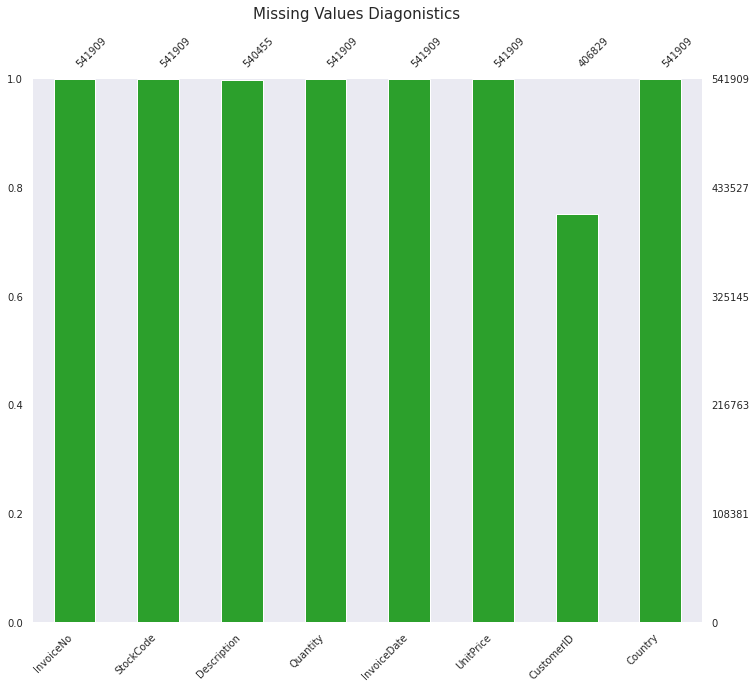

In [14]:
# Diagonising the retail_data to find is there any missing values in the dataset
sns.set_theme(style="dark")
fig,ax = plt.subplots(1,1)
fig.suptitle('Missing Values Diagonistics',fontsize = 15)
ax = miss_val.bar(retail_data, figsize=(12,10), fontsize=10, labels=True, color='tab:green')

* From above pictorial representation. We came to know that there is missing values in **CustomerID** feature.

## <b>  Missing Values Imputation

In [15]:
# Missing Values are imputed by means of most frequent values
retail_df = retail_data.apply(lambda retail_data:retail_data.fillna(retail_data.value_counts().index[0]))

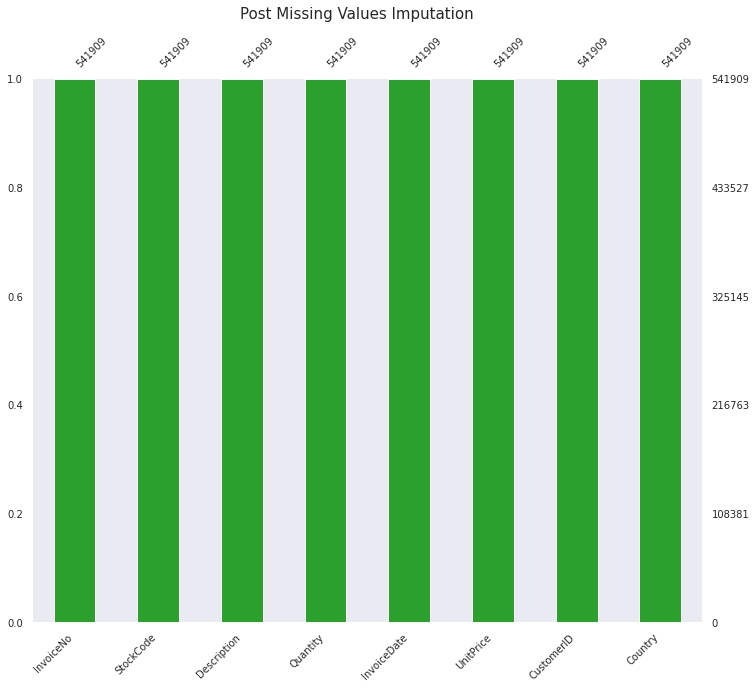

In [16]:
# After imputation of missing values. Final Check up for any missing values in the dataset.
sns.set_theme(style="dark")
fig, ax = plt.subplots(1,1)
fig.suptitle('Post Missing Values Imputation',fontsize=15)
ax = miss_val.bar(retail_df, figsize=(12,10), fontsize=10, labels=True, color='tab:green')

## <b> Data Imputation

In [17]:
# Removing Invoice Number starting with 'c'. Because 'c' it indicates order calncellation
retail_df['InvoiceNo'] = retail_df['InvoiceNo'].astype(str)
retail_df = retail_df[~retail_df['InvoiceNo'].str.contains('C')] 

In [18]:
# Handling negative values in Quantity and Unit Price
retail_df[['Quantity','UnitPrice']].describe()

Quantity      UnitPrice
count  532621.000000  532621.000000
mean       10.239972       3.847621
std       159.593551      41.758023
min     -9600.000000  -11062.060000
25%         1.000000       1.250000
50%         3.000000       2.080000
75%        10.000000       4.130000
max     80995.000000   13541.330000

From the above table. We could see that there is negative value in both quantity as well as unit price. We need to clean those negative values.

In [19]:
# Choose only rows of data wherein Quantity is positive
retail_df = retail_df[(retail_df['Quantity']>0)]
print('The Minimum value of Quantity is' ,retail_df['Quantity'].min())

The Minimum value of Quantity is 1


In [20]:
# Choose only rows of data wherein Unit Price is positive
retail_df = retail_df[(retail_df['UnitPrice']>0)]
print('The Minimum value of Unit Price is' ,retail_df['UnitPrice'].min())

The Minimum value of Unit Price is 0.001


# <b> Descriptive Analytics - Exploratory Data Analysis

---

> It involves analysis on each variable of the datasets based on following
1. Univariate Analysis - One Variable Analysis
2. Bivariate Analysis - Two Variable Analysis
3. Multivariate Analysis - Multiple Variable Analysis  



In [21]:
# For convenience purpose the dataset is copied and renamed
df = retail_df

## <b> Univariate Analysis 

---
> Analysis based on single variable at a time.

### <b> Quantity Variable
> * The quantities of each product (item) per transaction.
> * Analysing all the values in the quantity variable. 
> * And finding which has high impact on overall dataset.

In [22]:
# Quantity variable analysis
qan = df.Quantity.value_counts()

#### <b> High Quantity Purchase
> * Top 15 Quantity value of Purchase done by customer 

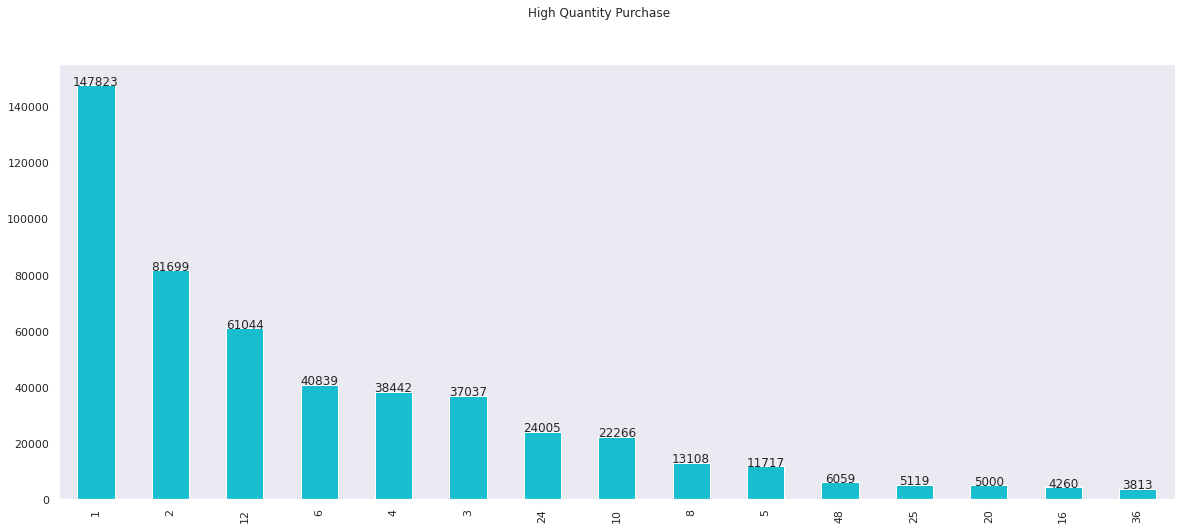

In [23]:
# Looking at High Quantity Purchase
fig,ax = plt.subplots(figsize=(20,8))
fig.suptitle('High Quantity Purchase', fontsize=12)
ax = qan.iloc[:15].plot(kind='bar',color='tab:cyan')
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2, height + 1,height ,ha="center")

### <b> Unit Price Variable
> * Unit price. Numeric, Product price per unit in sterling.
> * Analysing all the values in the unit price variable. 
> * And finding which has high impact on overall dataset.

In [24]:
# Unit Price variable analysis
unp = df.UnitPrice.value_counts()

#### <b> High Unit Price
> * Top 15 Unit Price value of purchase done by customer

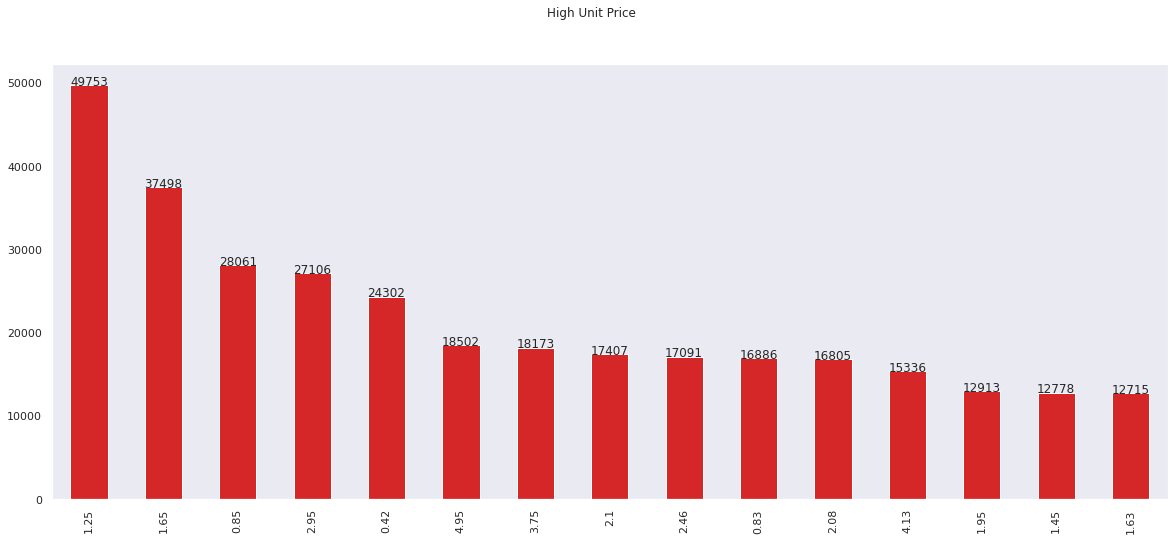

In [25]:
# Looking at High Unit Price
fig,ax = plt.subplots(figsize=(20,8))
fig.suptitle('High Unit Price', fontsize=12)
ax = unp.iloc[:15].plot(kind='bar',color='tab:red')
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2, height + 1,height ,ha="center")

### <b> Country Variable
> * The name of the country where each customer resides.
> * Analyzing all the values in the Country Variable.
> * And finding which has high impact on overall dataset.

In [26]:
# Country Variable Analysis
con = df.Country.value_counts()

#### <b> High Customer Population Countries
> * Top 15 Countries with high customer population

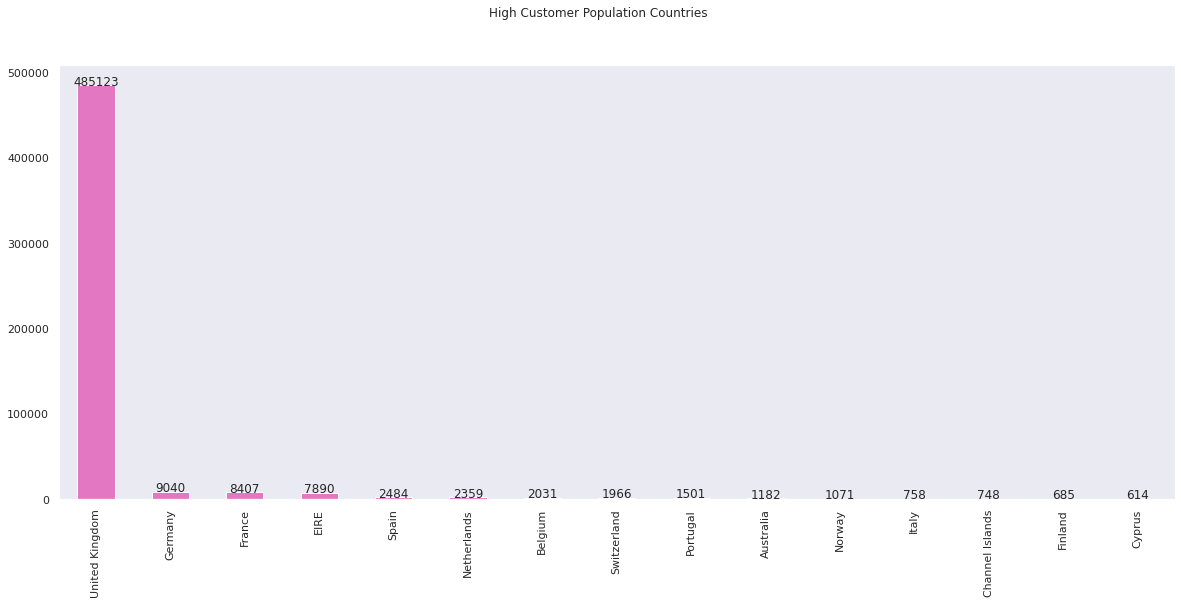

In [27]:
# Looking at High Customer Population Countries
fig,ax = plt.subplots(figsize=(20,8))
fig.suptitle('High Customer Population Countries', fontsize=12)
ax = con.iloc[:15].plot(kind='bar',color='tab:pink')
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2, height + 1,height ,ha="center")

#### <b> Medium Customer Population Countries
>* Countries with medium customer population but they are loyal.

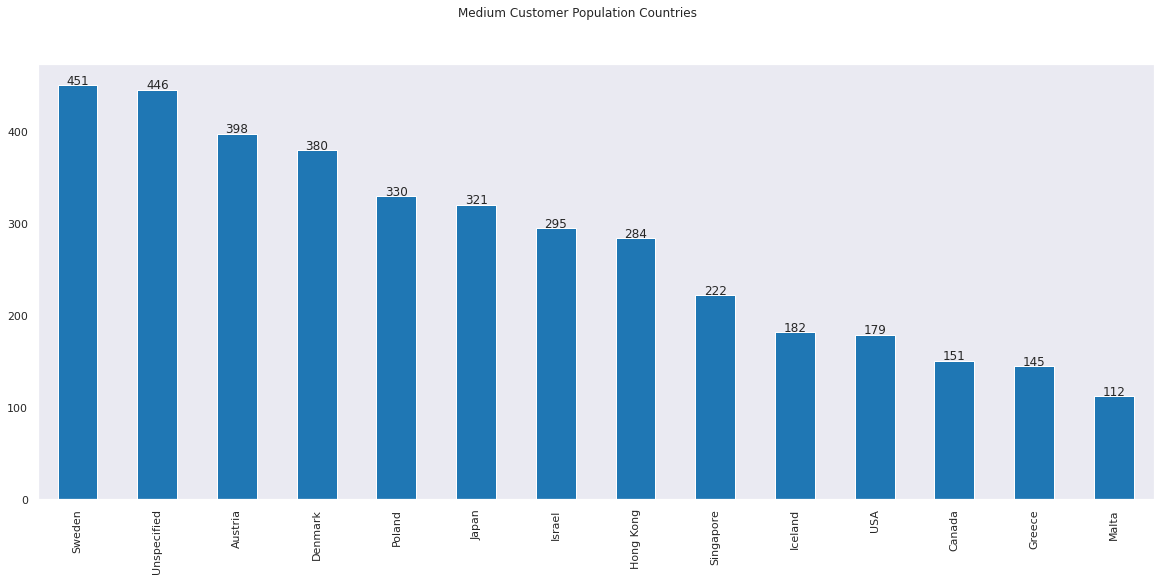

In [28]:
# Looking at Medium Customer Population Countries
fig,ax = plt.subplots(figsize=(20,8))
fig.suptitle('Medium Customer Population Countries', fontsize=12)
ax = con.iloc[15:-9].plot(kind='bar',color='tab:blue')
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2, height + 1,height ,ha="center")

#### <b> Low Customer Population Countries
>* Countries with low customer population and has higher chances for chruning out.

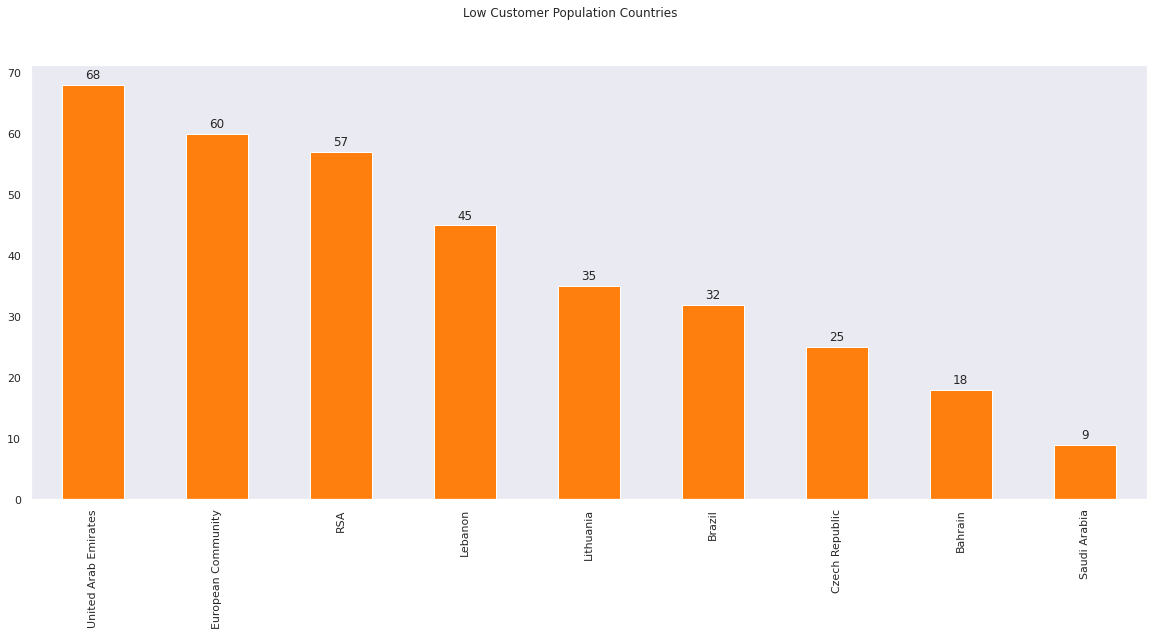

In [29]:
# Looking at Low Customer Population Countries
fig,ax = plt.subplots(figsize=(20,8))
fig.suptitle('Low Customer Population Countries', fontsize=12)
ax = con.iloc[-9:].plot(kind='bar',color='tab:orange')
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2, height + 1,height ,ha="center")

### <b> Description Variable
> * Product (item) name. Nominal.
> * Analysing all the values in the Description Variable.
> * And finding which has high impact on overall dataset.

In [30]:
# Description Variable Analysis
des = df.Description.value_counts()

#### <b> High Demand Products
>* Top 15 Products with high demand

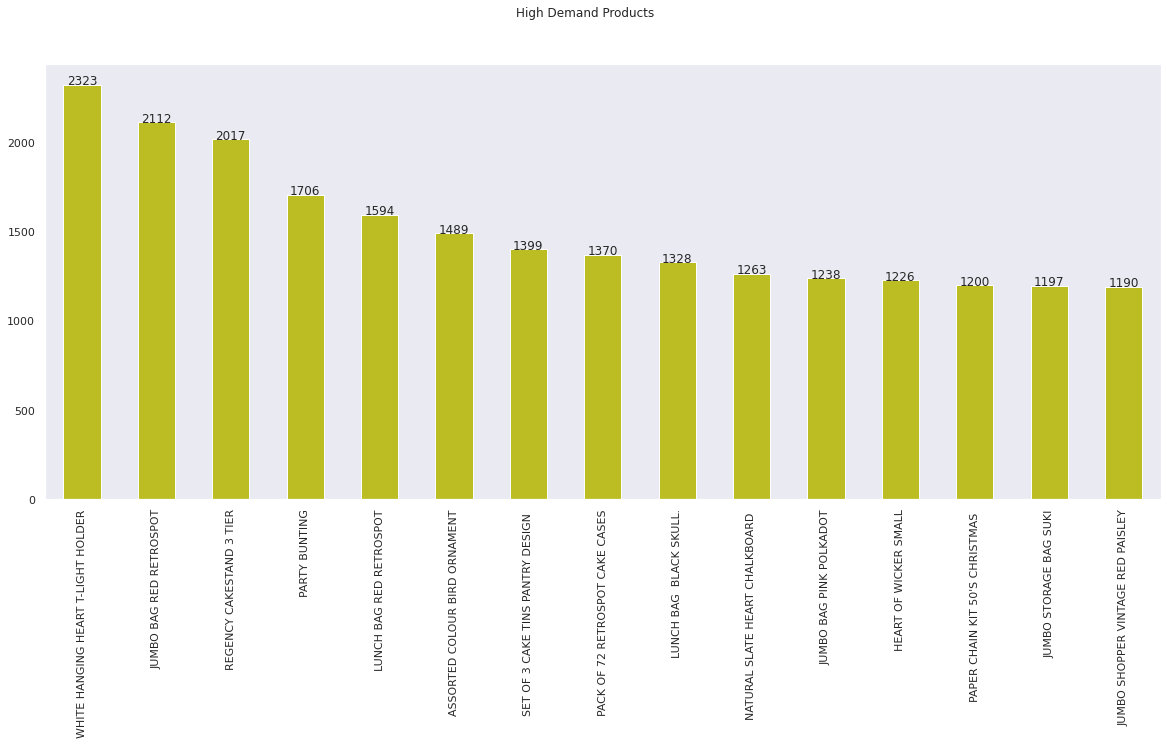

In [31]:
# Looking at High Demand Products
fig,ax = plt.subplots(figsize=(20,8))
fig.suptitle('High Demand Products', fontsize=12)
ax = des.iloc[:15].plot(kind='bar',color='tab:olive')
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2, height + 1,height ,ha="center")

#### <b> Low Demand Products
> * Bottom 15 Products with Low Demand from Customers. 

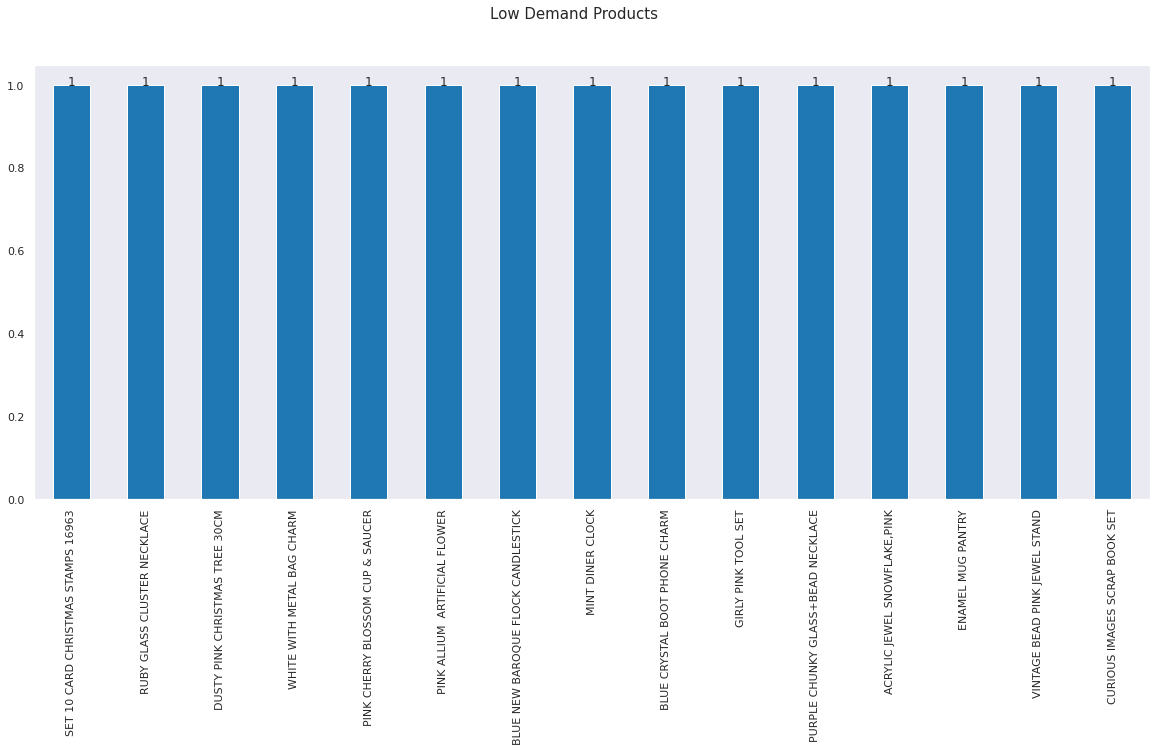

In [32]:
# Looking at Low Demand Products
fig,ax = plt.subplots(figsize=(20,8))
fig.suptitle('Low Demand Products', fontsize=15)
ax = des.iloc[-15:].plot(kind='bar',color='tab:blue')
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2, height,height ,ha="center")

### <b> Invoice Date Variable
> * Invoice Date and time. Numeric, the day and time when each transaction was generated.
> * Analysing all the values in Invoice Date Variable.
> * And finding which has high impact on overall dataset.

In [33]:
# Converting Invoice Date variable into seperate variables like Year, Day, and Month
df['Year']=df['InvoiceDate'].dt.strftime("%Y") 
df['Day']=df['InvoiceDate'].dt.strftime("%A")
df['Month']=df['InvoiceDate'].dt.strftime("%B")
df['Time']=df['InvoiceDate'].dt.time
df['Hour']=df['InvoiceDate'].dt.strftime("%H")
df['Minute']=df['InvoiceDate'].dt.strftime("%M")

#### <b> Day Variable
> * Peak Purchase Day

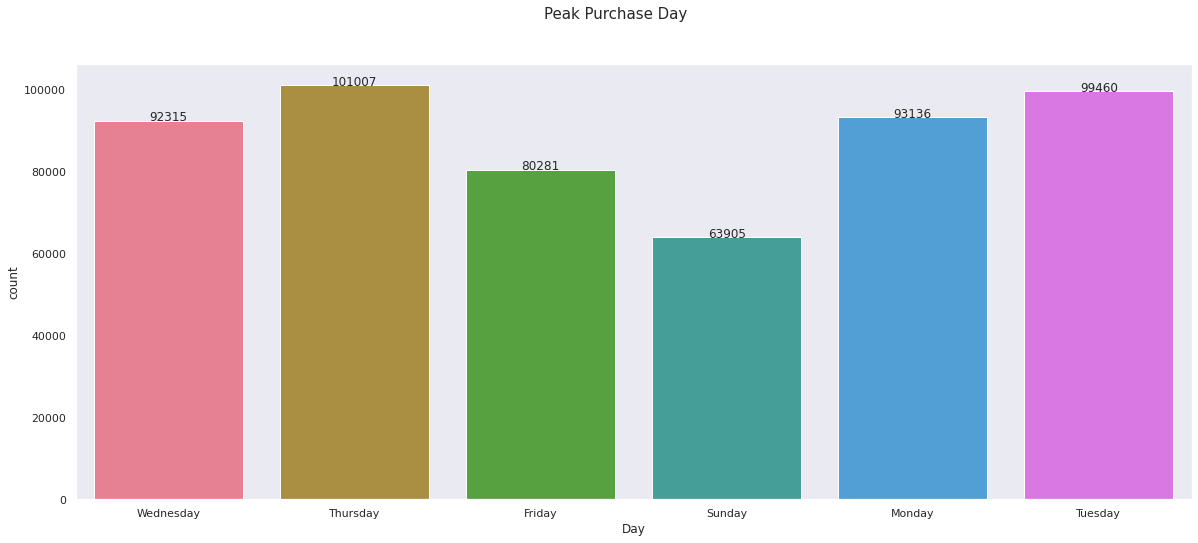

In [34]:
# Looking at Peak Purchase Day
fig,ax = plt.subplots(figsize = (20,8))
sns.set_theme(style="darkgrid")
fig.suptitle('Peak Purchase Day', fontsize=15)
ax = sns.countplot(data=df,x='Day',palette = "husl")
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2, height + 1,height ,ha="center")

#### <b> Month Variable
>* Peak Purchase Month

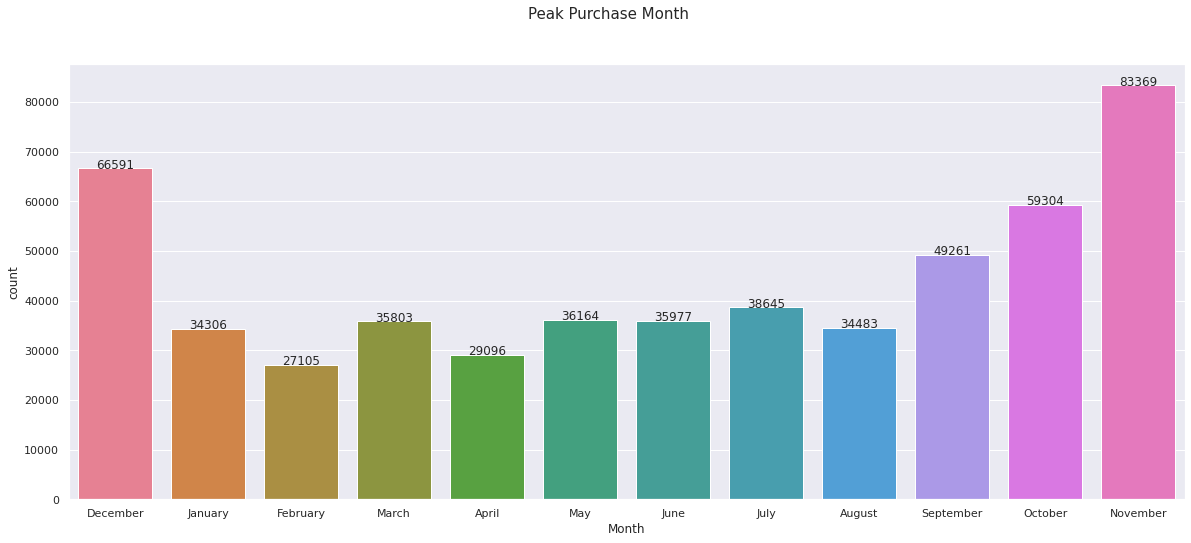

In [35]:
# Looking at Peak Purchase Month
fig,ax = plt.subplots(figsize = (20,8))
sns.set_theme(style="darkgrid")
fig.suptitle('Peak Purchase Month', fontsize=15)
ax = sns.countplot(data=df,x='Month',palette = "husl")
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2, height + 1,height ,ha="center")

#### <b> Year Variable
>* Peak Purchase Year

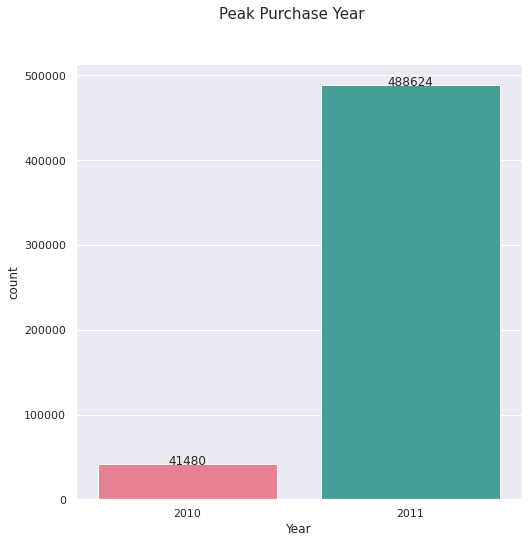

In [36]:
# Looking at Peak Purchase Year
fig,ax = plt.subplots(figsize = (8,8))
sns.set_theme(style="darkgrid")
fig.suptitle('Peak Purchase Year', fontsize=15)
ax = sns.countplot(data=df,x='Year',palette = "husl")
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2, height + 1,height ,ha="center")

#### <b> Hour Variable
>* Peak Purchase Hour (Time)

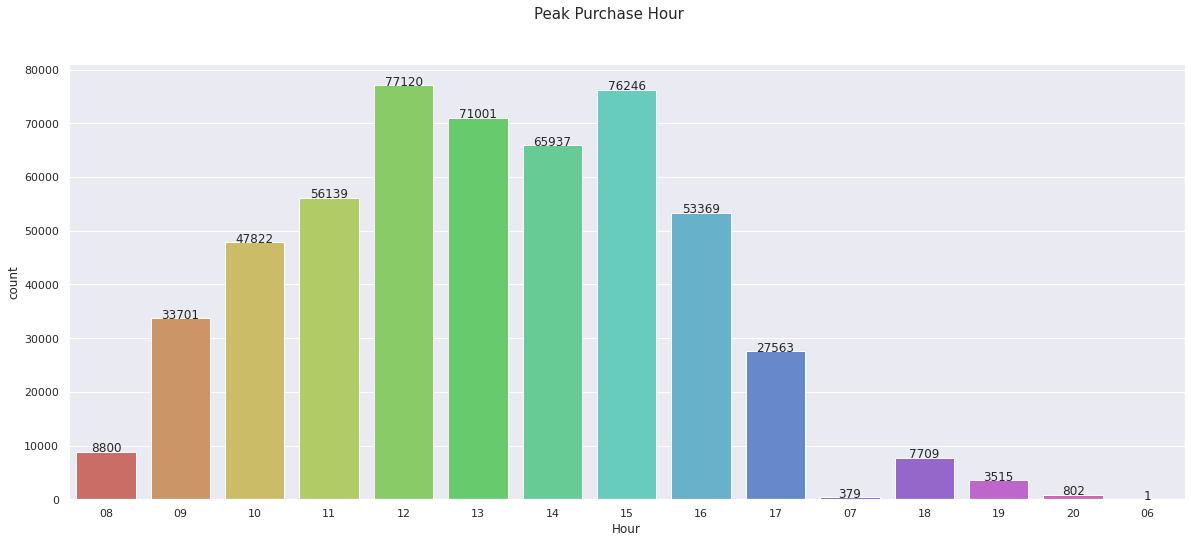

In [37]:
# Looking at Peak Hour
fig,ax = plt.subplots(figsize = (20,8))
sns.set_theme(style="darkgrid")
fig.suptitle('Peak Purchase Hour', fontsize=15)
ax = sns.countplot(data=df,x='Hour',palette = "hls")
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2, height + 1,height ,ha="center")

### <b> Stock Code Variable
> *  Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
> * Analysing all the values in Stock Code Variable.
> * And finding which has high impact on overall dataset.

In [38]:
# Stock Code Variable Analysis
Stc = df.StockCode.value_counts()

#### <b> Most Frequent Stock Code
> * Top 15 most frequent stock code

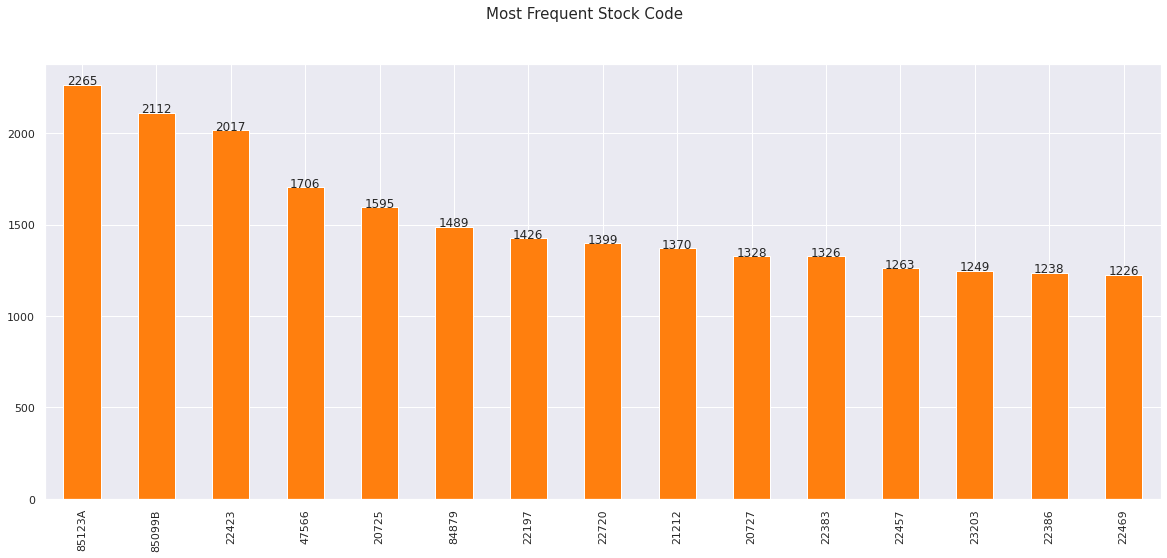

In [39]:
# Looking at Most Frequent Stock Code
fig,ax = plt.subplots(figsize=(20,8))
fig.suptitle('Most Frequent Stock Code', fontsize=15)
ax = Stc.iloc[:15].plot(kind='bar',color='tab:orange')
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2, height + 1,height ,ha="center")

#### <b> Less Frequent Stock Code
>* Bottom 15 less frequent stock code

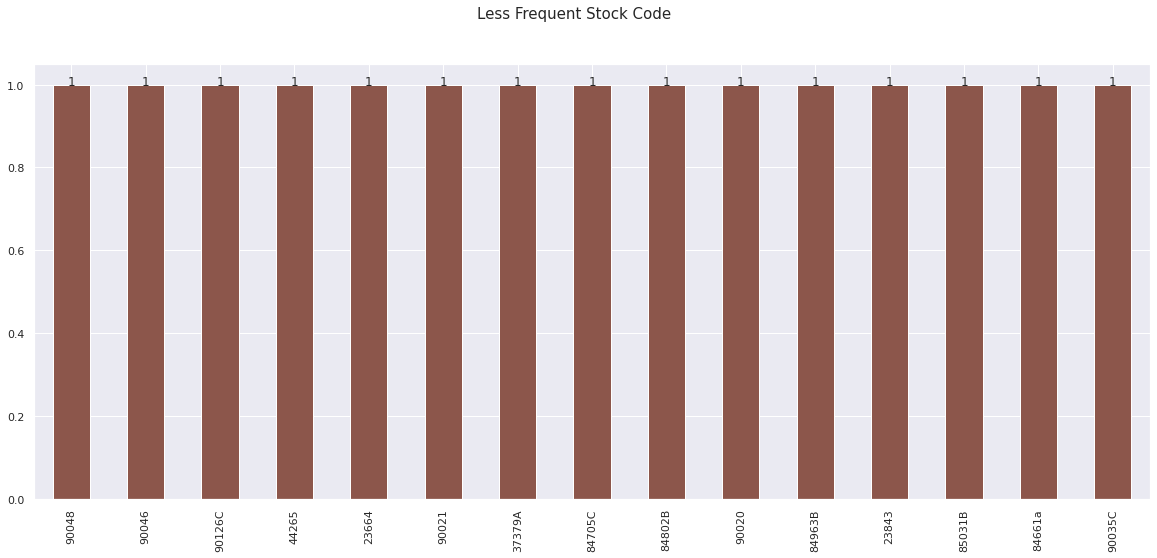

In [40]:
# Looking at Less Frequent Stock Code
fig,ax = plt.subplots(figsize=(20,8))
fig.suptitle('Less Frequent Stock Code', fontsize=15)
ax = Stc.iloc[-15:].plot(kind='bar',color='tab:brown')
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2, height,height ,ha="center")

## <b> Bivariate Analysis
> * Analysis based on two variable at a time.

### <b> Customer base Analysis
>* Following analysis was based on Country and Quantity of Purchase.
>* Our main focus to find the countries customer base based on No.of.Quantity of Products Purchased by the customers of those countries.
>* This analysis will give us overview about customer's buying behaviours. 

In [41]:
# Customer base which includes both country and quantity of purchase
customer_base = df.groupby('Country')['Quantity'].sum().sort_values(ascending = False).astype(int)

#### <b> High Customer base Countries
> * Following countries customer's are high quantity buyers. 

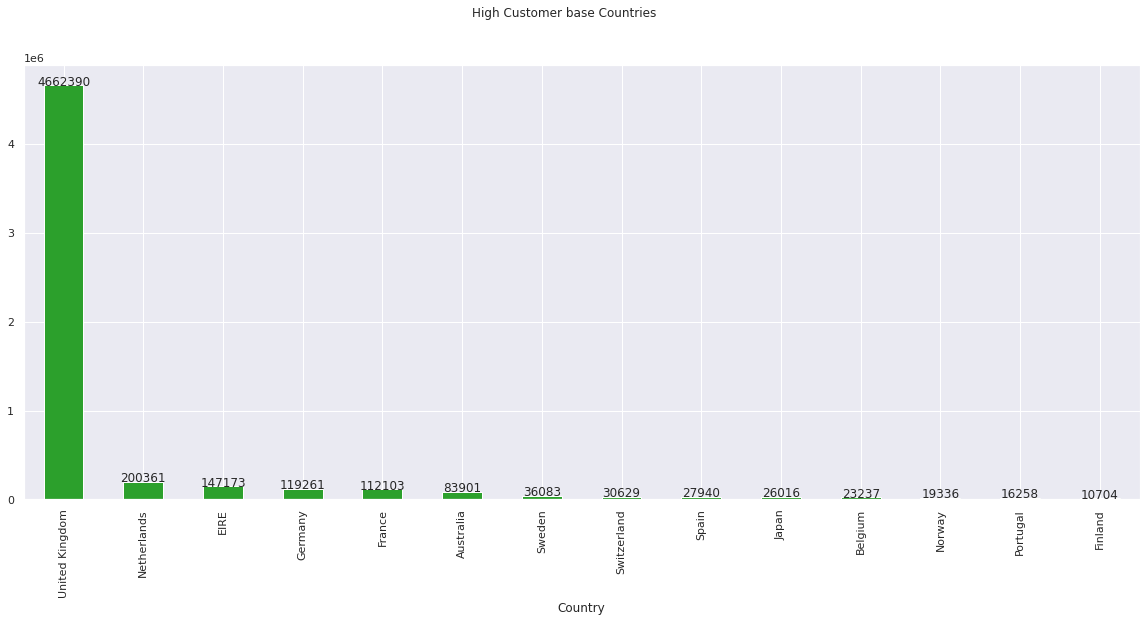

In [42]:
# Looking at High customer base countries
fig,ax = plt.subplots(figsize=(20,8))
fig.suptitle('High Customer base Countries', fontsize=12)
ax = customer_base[:14].plot(kind='bar',color='tab:green')
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2, height + 1,height ,ha="center")

#### <b> Medium Customer base Countries
> * Following countries customer's are moderate quantity buyers.

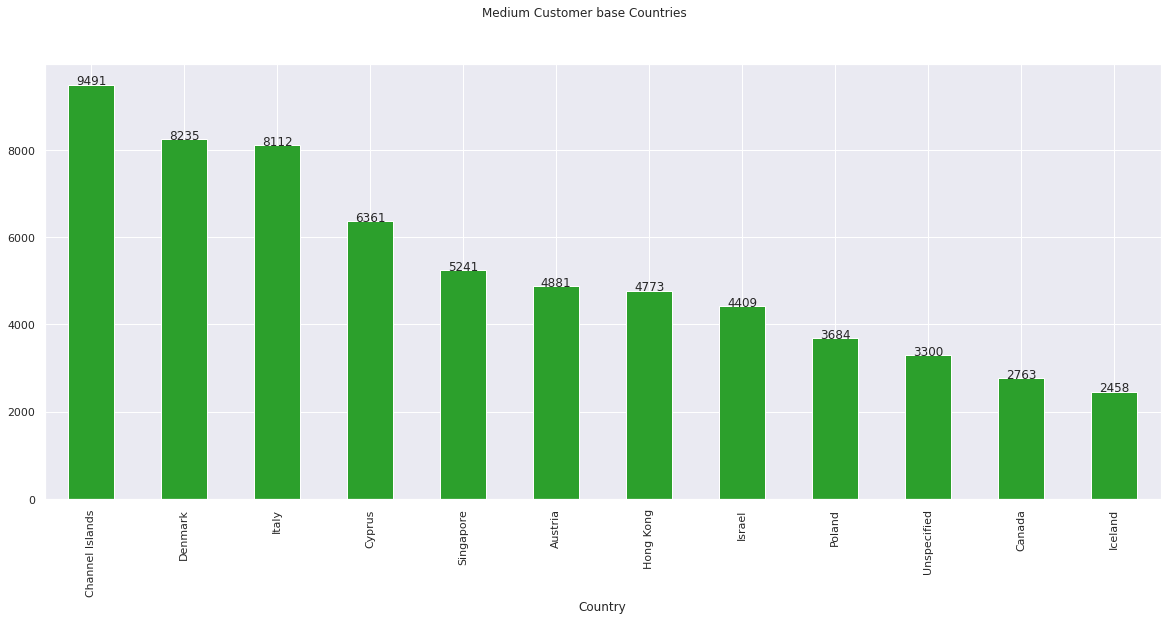

In [43]:
# Looking at Medium customer base countries
fig,ax = plt.subplots(figsize=(20,8))
fig.suptitle('Medium Customer base Countries', fontsize=12)
ax = customer_base[14:26].plot(kind='bar',color='tab:green')
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2, height+1,height ,ha="center") 

#### <b> Low Customer base Countries
> * Following countries customer's are few quantity buyers

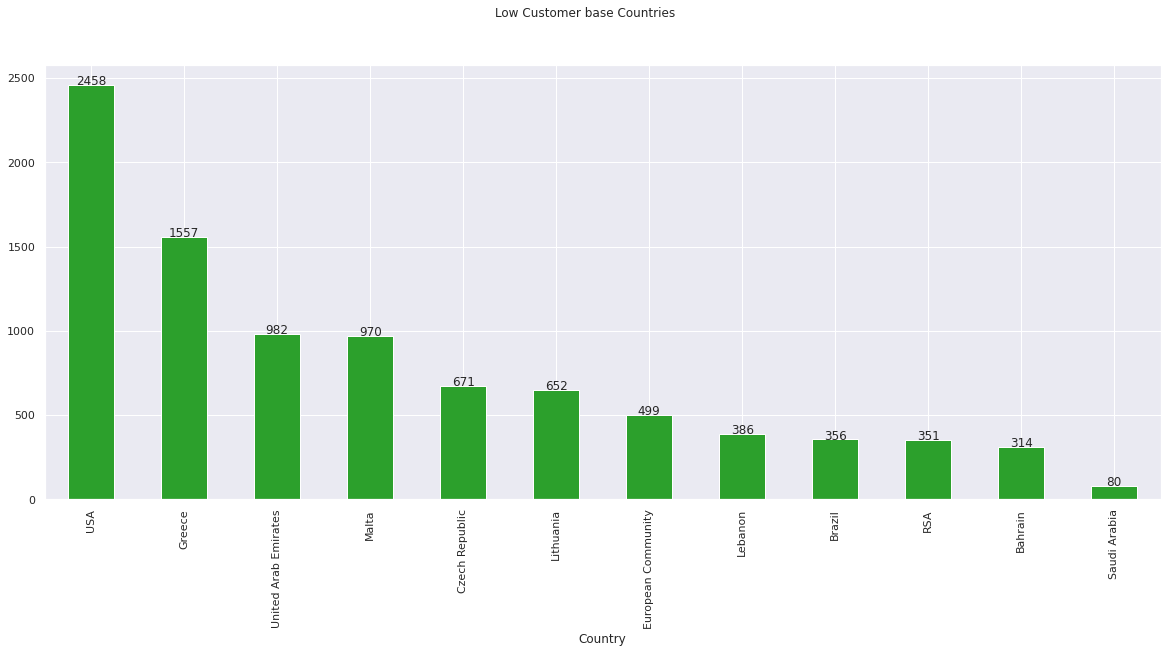

In [44]:
# Looking at Low customer base countries
fig,ax = plt.subplots(figsize=(20,8))
fig.suptitle('Low Customer base Countries', fontsize=12)
ax = customer_base[26:].plot(kind='bar',color='tab:green')
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2, height + 1,height ,ha="center") 

### <b> United Kingdom Customer Analysis
> * As almost 90 % of customers are from UK.
> * So it is obvious to shift our focus towards UK Customer.
> * Following analysis will be focused on UK.

#### <b> Peak Purchase Day in UK
> * This Analysis will help us to focus our Marketing Champaign.
> * The Decision are taken based on the outcome of this analysis.

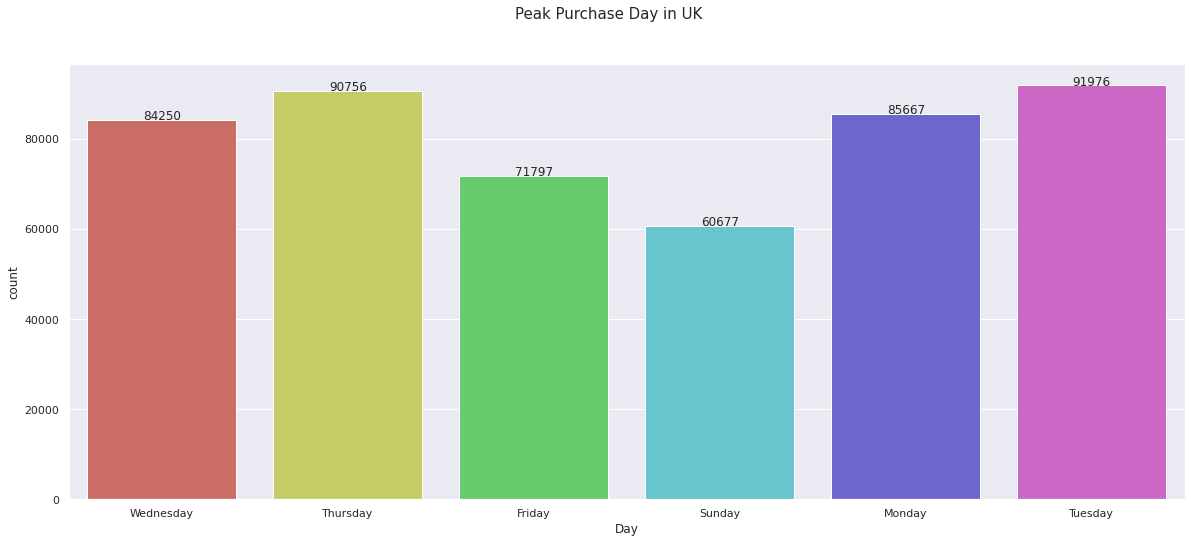

In [45]:
# Peak Purchase Day in UK
sns.set_theme(style='darkgrid')
fig,ax = plt.subplots(figsize = (20,8))
fig.suptitle('Peak Purchase Day in UK',fontsize=15)
ax = sns.countplot(data=df[df['Country']=='United Kingdom'],x='Day',palette='hls')
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2, height + 1,height ,ha="center") 

#### <b> Peak Purchase Months in UK
> * This Analysis will help us to focus our Marketing Champaign.
> * The Decision are taken based on the outcome of this analysis.

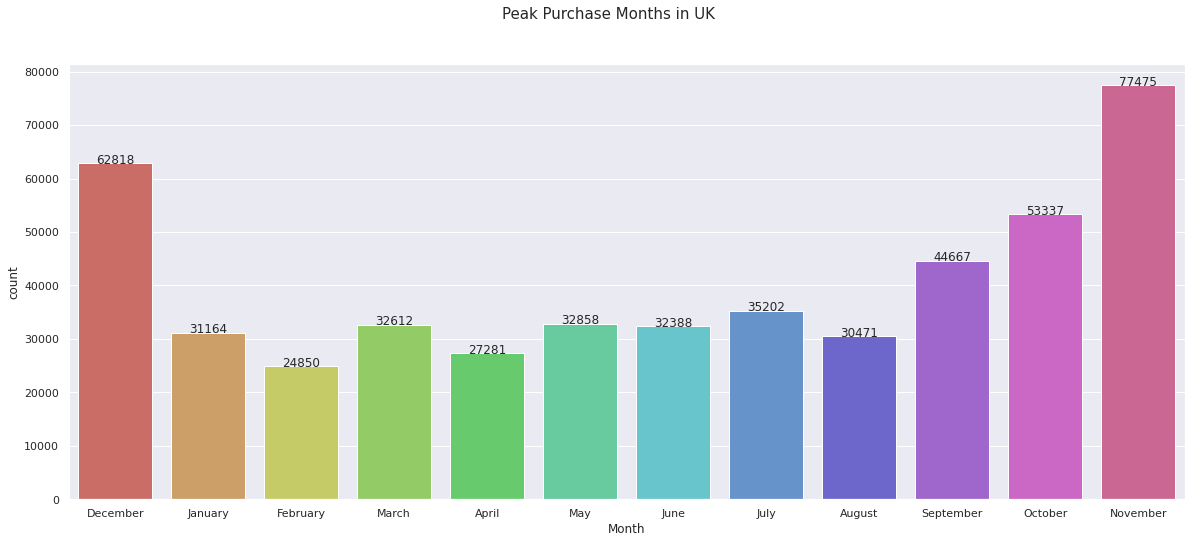

In [46]:
# Peak Purchase Months in UK
sns.set_theme(style='darkgrid')
fig,ax = plt.subplots(figsize = (20,8))
fig.suptitle('Peak Purchase Months in UK',fontsize=15)
ax = sns.countplot(data=df[df['Country']=='United Kingdom'],x='Month',palette='hls')
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2, height + 1,height ,ha="center") 

#### <b> Peak Purchase Hour in UK
> * This Analysis will help us to focus our Marketing Champaign.
> * The Decision are taken based on the outcome of this analysis.

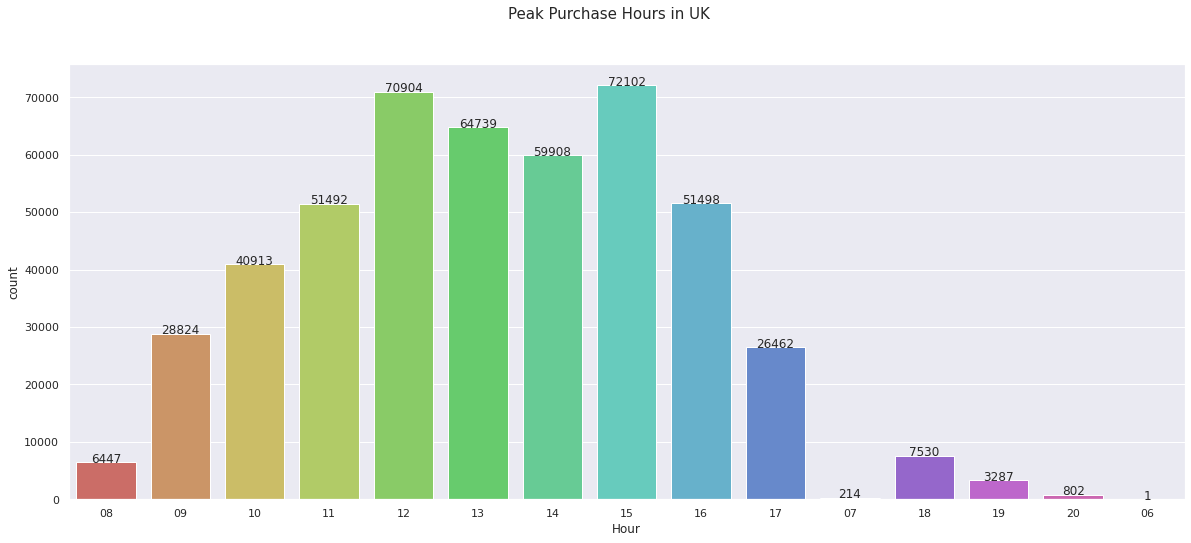

In [47]:
# Peak Purchase Hours in UK
sns.set_theme(style='darkgrid')
fig,ax = plt.subplots(figsize = (20,8))
fig.suptitle('Peak Purchase Hours in UK',fontsize=15)
ax = sns.countplot(data=df[df['Country']=='United Kingdom'],x='Hour',palette='hls')
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2, height + 1,height ,ha="center") 

### <b> Saudi Arabia Customer Analysis
> * As least customers base are from Saudi Arabia.
> * So it is obvious to have our focus on Saudi Arabia Customer.
> * Also this analysis will help analysis important factors which contributed for chruning out of customers.
> * Following analysis will be focused on Saudi Arabia.

#### <b> Peak Purchase Day in Saudi Arabia
> * This Analysis will help us to focus our Marketing Champaign.
> * The Decision are taken based on the outcome of this analysis.

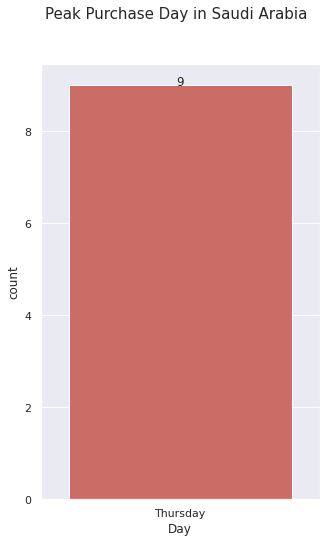

In [48]:
# Peak Purchase Day in Saudi Arabia
sns.set_theme(style='darkgrid')
fig,ax = plt.subplots(figsize = (5,8))
fig.suptitle('Peak Purchase Day in Saudi Arabia',fontsize=15)
ax = sns.countplot(data=df[df['Country']=='Saudi Arabia'],x='Day',palette='hls')
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2, height ,height ,ha="center") 

#### <b> Peak Purchase Months in Saudi Arabia
> * This Analysis will help us to focus our Marketing Champaign.
> * The Decision are taken based on the outcome of this analysis.

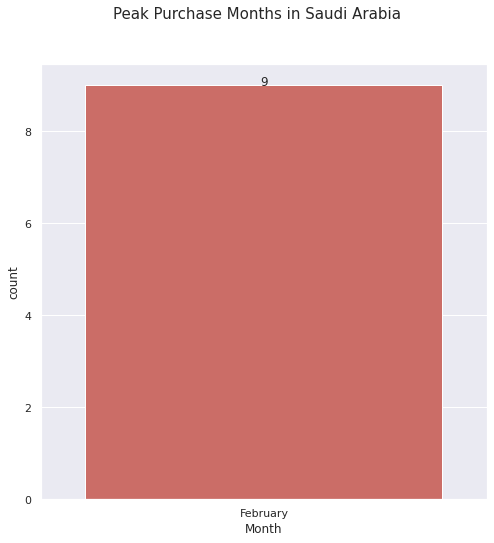

In [49]:
# Peak Purchase Months in Saudi Arabia
sns.set_theme(style='darkgrid')
fig,ax = plt.subplots(figsize = (8,8))
fig.suptitle('Peak Purchase Months in Saudi Arabia',fontsize=15)
ax = sns.countplot(data=df[df['Country']=='Saudi Arabia'],x='Month',palette='hls')
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2, height ,height ,ha="center") 

#### <b> Peak Purchase Hour in Saudi Arabia
> * This Analysis will help us to focus our Marketing Champaign.
> * The Decision are taken based on the outcome of this analysis.

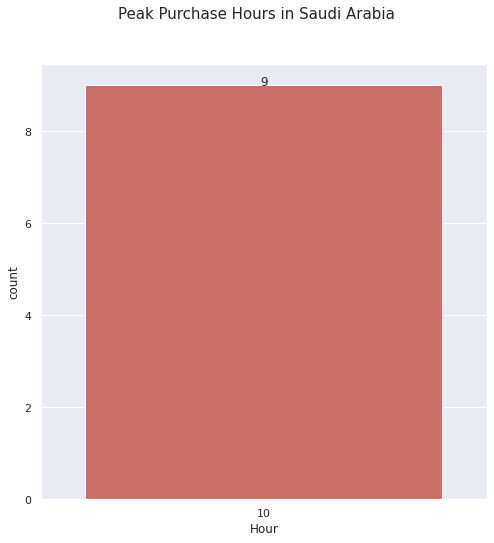

In [50]:
# Peak Purchase Hours in Saudi Arabia
sns.set_theme(style='darkgrid')
fig,ax = plt.subplots(figsize = (8,8))
fig.suptitle('Peak Purchase Hours in Saudi Arabia',fontsize=15)
ax = sns.countplot(data=df[df['Country']=='Saudi Arabia'],x='Hour',palette='hls')
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2, height ,height ,ha="center") 

## <b> Multivariate Analysis
> * Analysis based on Multiple Variable at a time.
> * The main objective of this analysis is to find some hidden patterns prevailed in the dataset.

### <b> Demand Analysis
>* Analysis based on Customer demand and its supply.

In [51]:
# Demand which includes both Quantity of purchase and its requirement such as Day, Month, Year
demand = df.groupby('Description')['Quantity'].sum().sort_values(ascending = False)
demand.head()

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        78033
WORLD WAR 2 GLIDERS ASSTD DESIGNS     55047
JUMBO BAG RED RETROSPOT               48474
WHITE HANGING HEART T-LIGHT HOLDER    37891
Name: Quantity, dtype: int64

#### <b> Number of Holidays
> * Following analysis involves in finding the most demanded products in the weekends.
> * This analysis might help us plan our logisitic chain especially in weekends.

In [52]:
# Holidays(Sunday's) most demanded Products 
df['Holiday'] = (df.Day == 'Sunday').astype(str)
df['Holiday'] = df['Holiday'].replace({"False":0,"True":1})

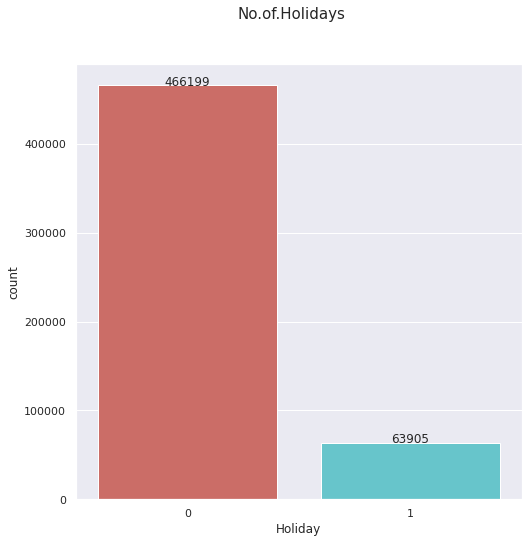

In [53]:
# No.of.Holidays
fig,ax = plt.subplots(figsize = (8,8))
sns.set_theme(style="darkgrid")
fig.suptitle('No.of.Holidays', fontsize=15)
ax = sns.countplot(data=df,x='Holiday',palette = "hls")
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2, height + 1,height ,ha="center")

#### <b> Peak Hours on Holiday
> * Following analysis involves in finding the Peak Hour in Holiday.
> * This analysis helps us to find most peak hour in holidays.

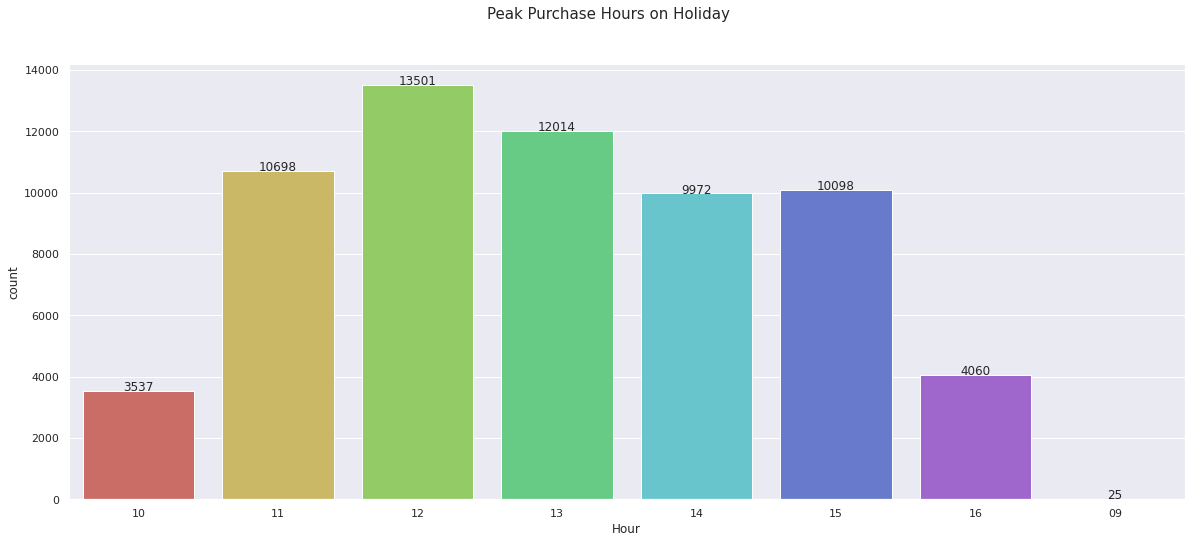

In [54]:
# Peak Purchase Hours on Holidays
fig,ax = plt.subplots(figsize = (20,8))
sns.set_theme(style="darkgrid")
fig.suptitle('Peak Purchase Hours on Holiday', fontsize=15)
ax = sns.countplot(data=df[df['Holiday']==1],x='Hour',palette = "hls")
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2, height + 1,height ,ha="center")

#### <b> Most Wanted Products on Holiday
> * Following analysis will give us overview of most wanted products on Holiday like saturday and sunday.

In [55]:
# Modifying the dataset to find out which product has most demand on holidays
df_1 = df
df_1 = df_1[df_1['Holiday']!=0]
print(df_1.Holiday.value_counts())
dem = df_1.groupby('Description')['Holiday'].sum().sort_values(ascending = False)
print(dem.head())

1    63905
Name: Holiday, dtype: int64
Description
WHITE HANGING HEART T-LIGHT HOLDER    339
REX CASH+CARRY JUMBO SHOPPER          226
HEART OF WICKER SMALL                 211
JUMBO BAG RED RETROSPOT               198
ASSORTED COLOUR BIRD ORNAMENT         196
Name: Holiday, dtype: int64


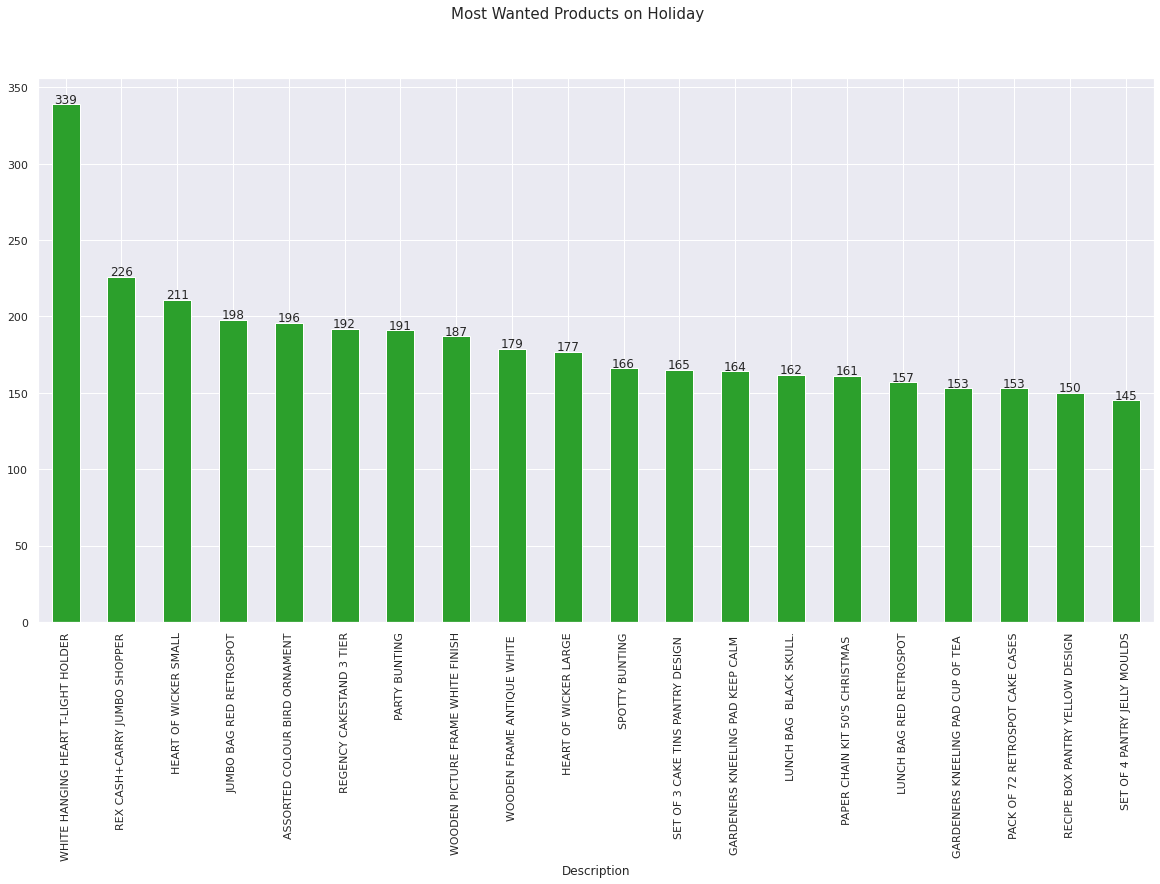

In [56]:
# Looking at Most Wanted Products on Holiday
fig,ax = plt.subplots(figsize=(20,10))
fig.suptitle('Most Wanted Products on Holiday', fontsize=15)
ax = dem.iloc[:20].plot(kind='bar',color='tab:green')
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2,height+1,height,ha="center")

#### <b> Least Wanted Products on Holiday
>* Following analysis will give overview of least wanted products on holiday

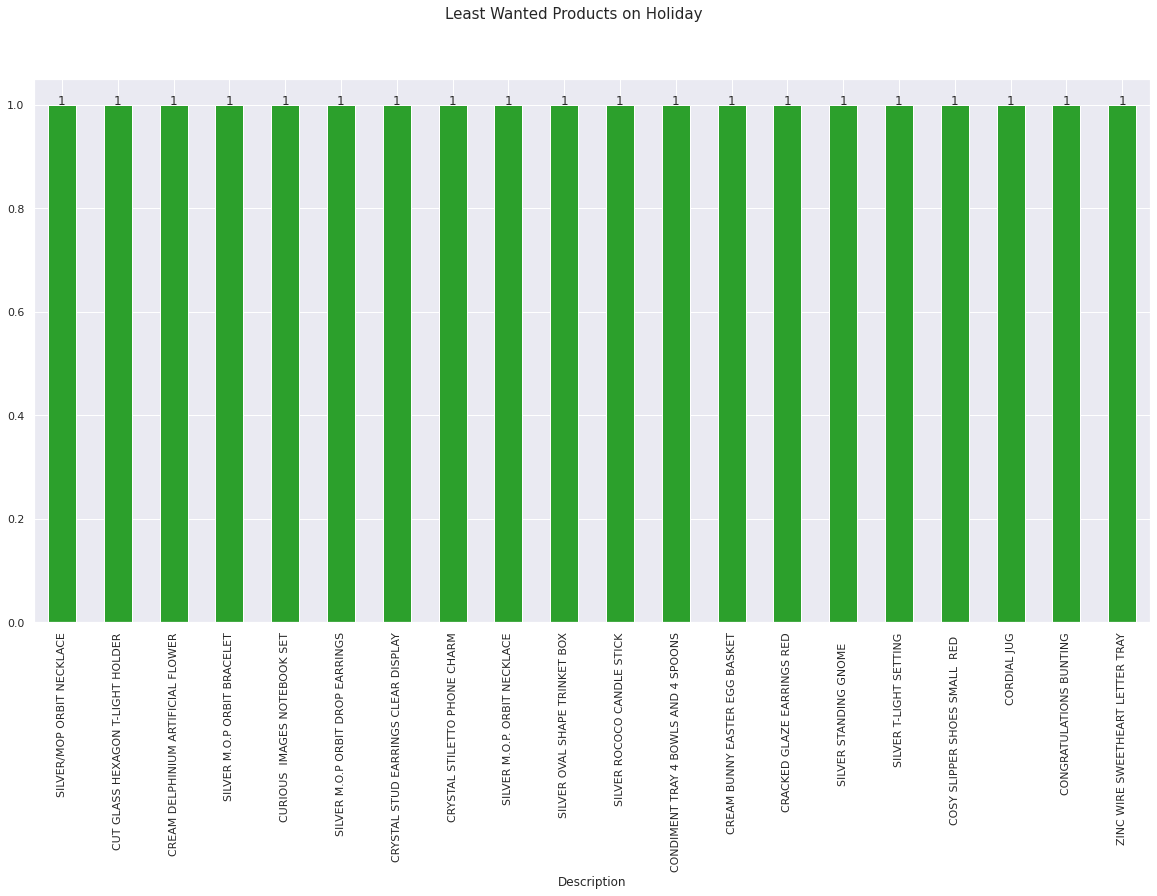

In [57]:
# Looking at Least Wanted Products on Holiday
fig,ax = plt.subplots(figsize=(20,10))
fig.suptitle('Least Wanted Products on Holiday', fontsize=15)
ax = dem.iloc[-20:].plot(kind='bar',color='tab:green')
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2,height,height,ha="center")

### <b> Festive Season Analysis
> * It involves analysing the customer purchase particularly in Festive Season.
> * Usually most of the western countries have their festive holidays from November to Feburary.
> * The Outcome of this analysis will help us to plan effectively both marketing and sales champaign on festive season.
> * Then it will eventually increase the overall purchase.  

In [58]:
# Making new variable as Festive Season
df['Festive_Season'] = ((df.Month == 'November') | (df.Month == 'December') | (df.Month == 'January') | (df.Month == 'Feburary')).astype(str)
df['Festive_Season'] = df['Festive_Season'].replace({'False':0,'True':1})

In [59]:
# Modifying the dataset to find out which product has most demand on Feastive Season
df_1 = df
df_1 = df_1[df_1['Festive_Season']!=0]
print(df_1.Festive_Season.value_counts())
dem1 = df_1.groupby('Description')['Festive_Season','Quantity'].sum().sort_values(by='Festive_Season',ascending=False)
print(dem1.head())

1    184266
Name: Festive_Season, dtype: int64
                                    Festive_Season  Quantity
Description                                                 
WHITE HANGING HEART T-LIGHT HOLDER             743     15133
PAPER CHAIN KIT 50'S CHRISTMAS                 710     12481
RABBIT NIGHT LIGHT                             653     19265
REGENCY CAKESTAND 3 TIER                       577      4633
JUMBO BAG RED RETROSPOT                        543     11912


#### <b> Most Wanted Products on Festive Season
> * Following Analysis will give us the overview of most wanted products during feastive season.

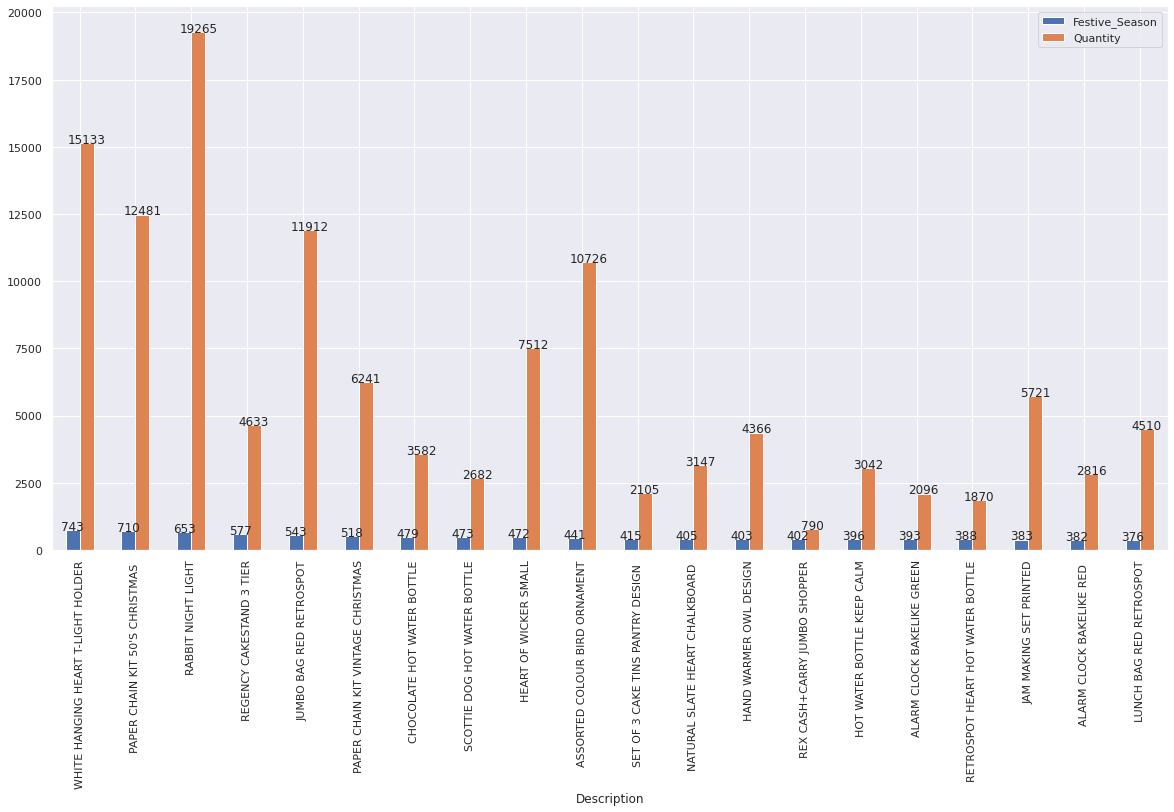

In [60]:
# Looking into most wanted products on feastive season
fig.suptitle('Most Wanted Products on Festive Season', fontsize = 15)
plt.rcParams["figure.figsize"] = (20,10)
ax = dem1[:20].plot(kind='bar')
for i in ax.patches:
  height = i.get_height()
  width = i.get_width()
  ax.text(i.get_x()+width/2,height+1,height,ha="center")

#### <b> Least Wanted Products on Feastive Season
> * Following Analysis will give us the overview of least wanted products during feastive season.

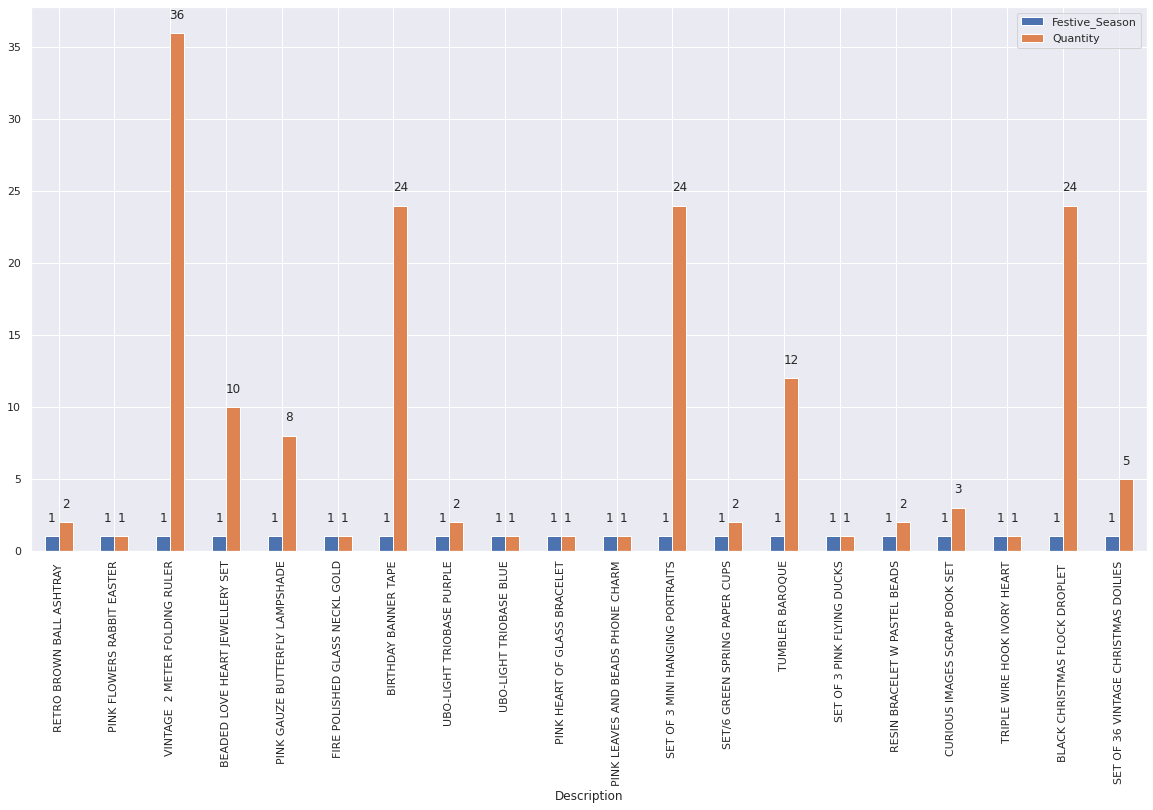

In [61]:
# Looking into least wanted products on festive season
fig.suptitle('Least Wanted Products on Festive Season', fontsize=15)
plt.rcParams["figure.figsize"] = (20,10)
ax = dem1[-20:].plot(kind='bar')
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2,height+1,height,ha="center")

### <b> Sales Analysis
>* It involves analysing the Total Sales.
>* The Outcome of this analysis will help us to plan effectively both marketing and sales champaign on festive season.
>* Then it will eventually increase the overall sales.

In [62]:
# New variable called Total Amount which is product of both unit price and quantity
df['Total_Amount'] = df['Quantity'] * df['UnitPrice']

#### <b> Average Sales of Each Products
> * This will give us an overview about each and every products sales.

In [63]:
 # Looking at average sales of the products
 avg_sales = df.groupby(['StockCode','Description'])['Quantity','Total_Amount'].mean().sort_values(by='Quantity',ascending=False)
 avg_sales

Quantity   Total_Amount
StockCode Description                                                  
23843     PAPER CRAFT , LITTLE BIRDIE       80995.000000  168469.600000
47556B    TEA TIME TEA TOWELS                1300.000000    3022.500000
23166     MEDIUM CERAMIC TOP STORAGE JAR      312.132000     326.803680
20914     SET/5 RED SPOTTY LID GLASS BOWLS    288.000000     734.400000
16014     SMALL CHINESE STYLE SCISSOR         246.814815      80.291852
...                                                  ...            ...
90021     LASER CUT MULTI STRAND NECKLACE       1.000000      11.950000
90020     FILIGREE DIAMANTE CHAIN               1.000000      12.480000
21414     SCALLOP SHELL SOAP DISH               1.000000       2.100000
85179a    GREEN BITTY LIGHT CHAIN               1.000000       2.460000
m         Manual                                1.000000       2.550000

[4161 rows x 2 columns]

#### <b> Top Country wise Sales
> * Following analysis involves finding top countries based on Sales.

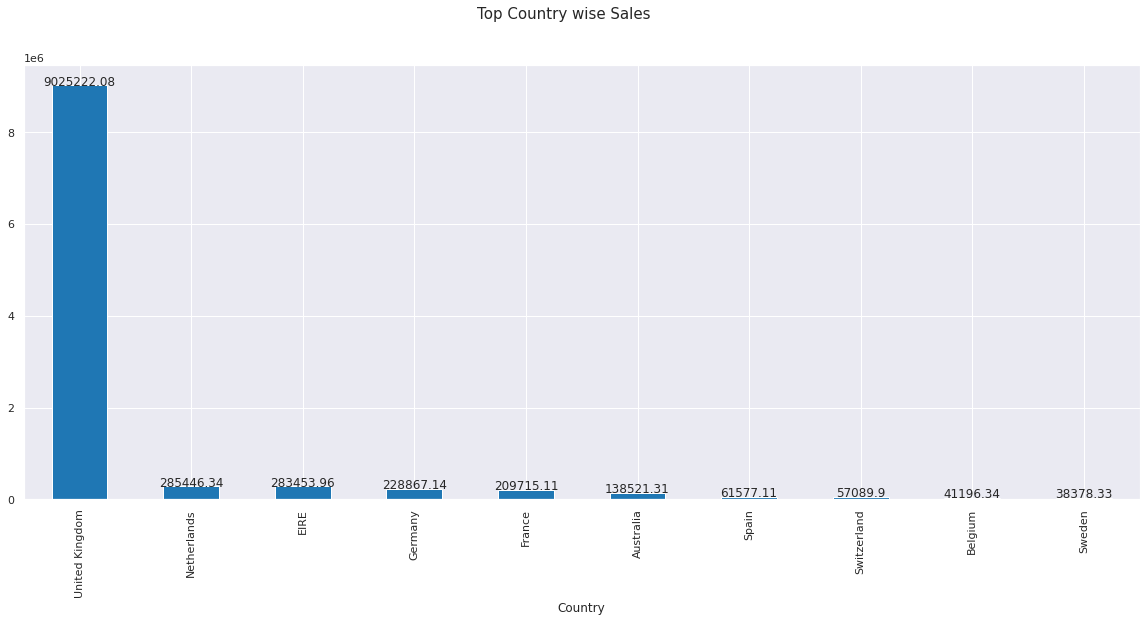

In [64]:
# Looking at top country wise sales
fig,ax = plt.subplots(figsize=(20,8))
fig.suptitle('Top Country wise Sales', fontsize=15)
d_2 = df.groupby(['Country'])['Total_Amount'].sum().sort_values(ascending=False).round(2)
ax = d_2[:10].plot(kind='bar',color='tab:blue')
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2, height + 1,height ,ha="center")

#### <b> Bottom Country wise Sales
> * Following analysis involves finding bottom countries based on Sales.

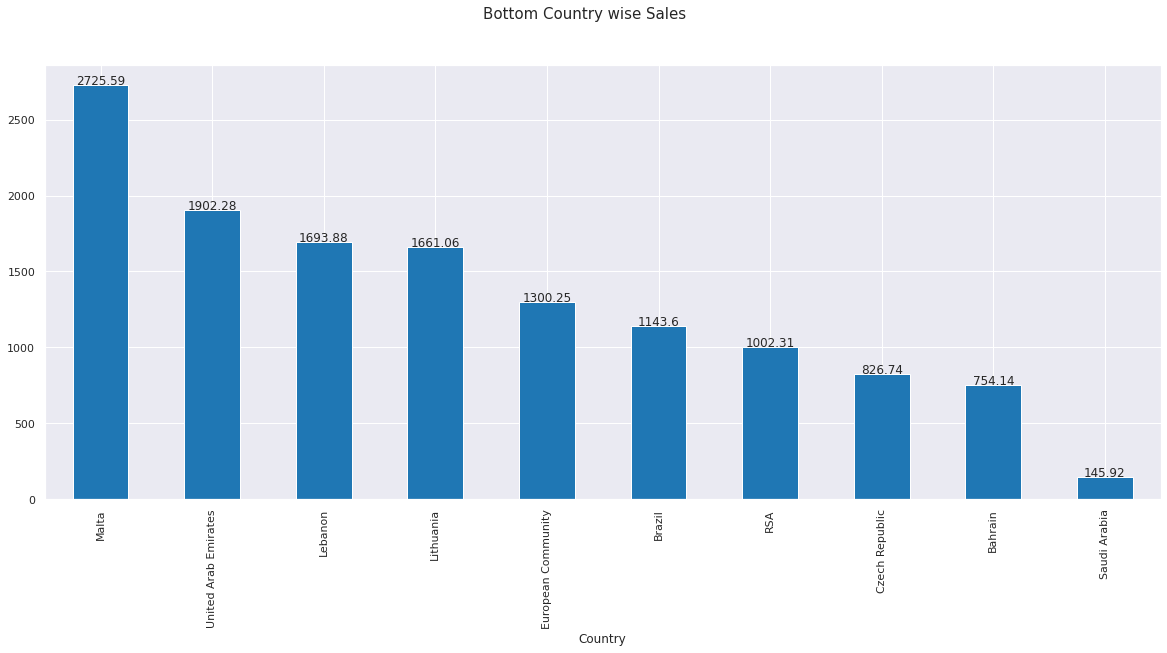

In [65]:
# Looking at bottom country wise sales
fig,ax = plt.subplots(figsize=(20,8))
fig.suptitle('Bottom Country wise Sales', fontsize=15)
ax = d_2[-10:].plot(kind='bar',color='tab:blue')
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2, height + 1,height ,ha="center")

#### <b> Most Demanded Products
> * Following analysis involves finding the most demanded products.
> * This analysis might help us to effectively plan our Supply of the product.

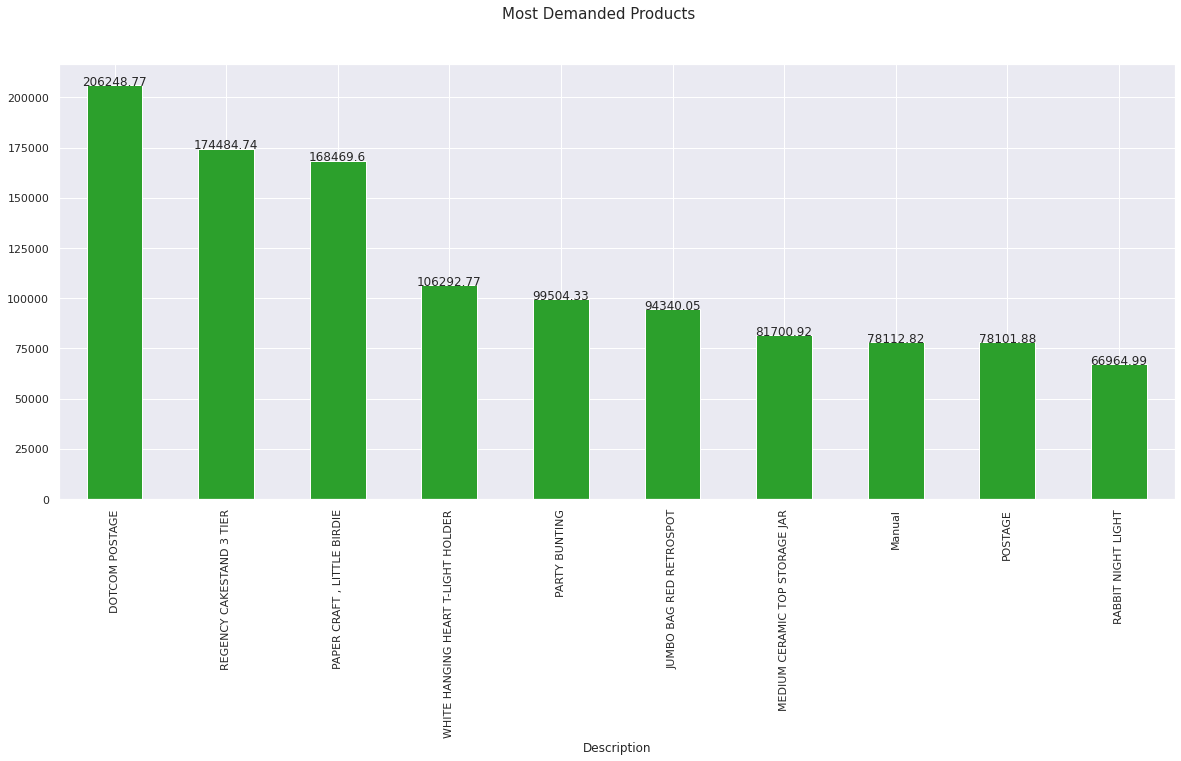

In [66]:
# Looking at Most Demanded Products
fig,ax = plt.subplots(figsize=(20,8))
fig.suptitle('Most Demanded Products', fontsize=15)
d_1 = df.groupby(['Description'])['Total_Amount'].sum().sort_values(ascending=False).round(2)
ax = d_1[:10].plot(kind='bar',color='tab:green')
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2, height + 1,height ,ha="center")

#### <b> Least Demanded Products
> * Following analysis involves finding the least demanded products.
> * This analysis might help us to plan effective our marketing champaign. 

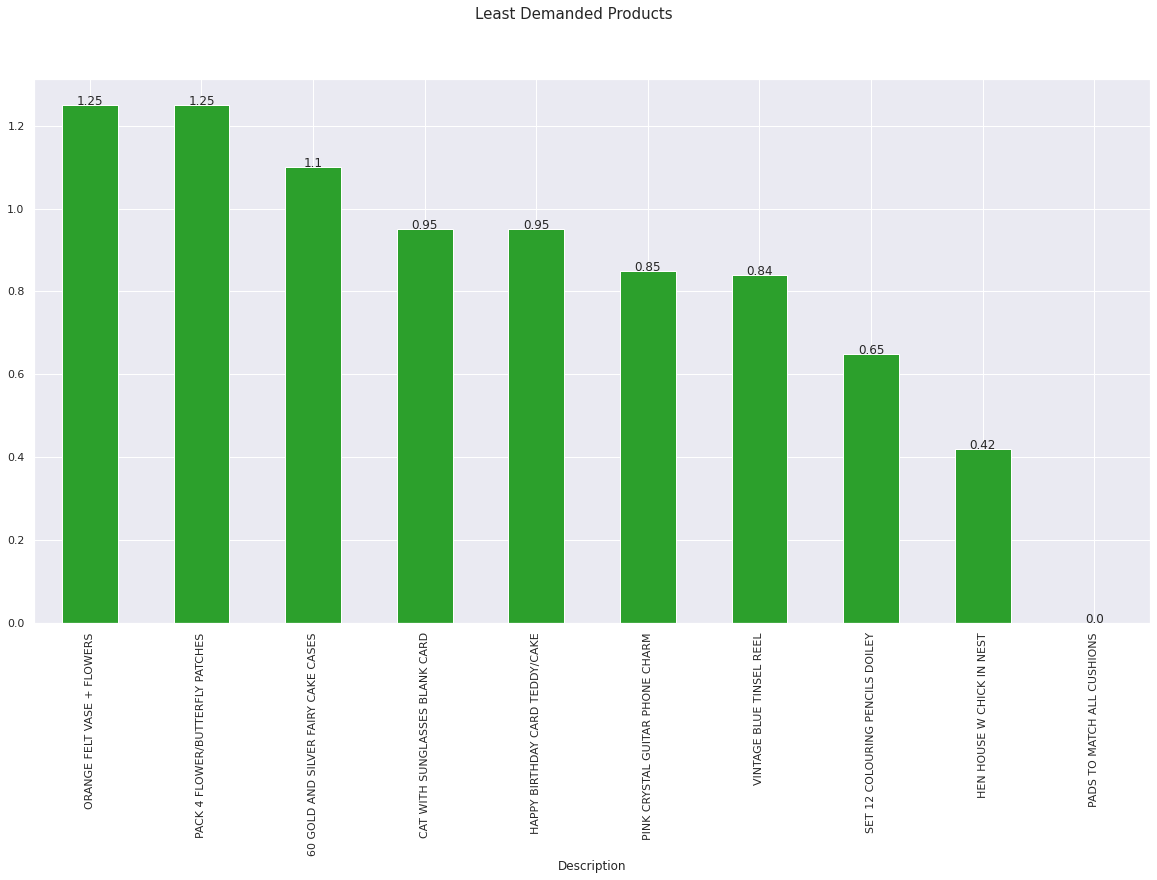

In [144]:
# Looking at Least Demanded Products
fig,ax = plt.subplots(figsize=(20,10))
fig.suptitle('Least Demanded Products', fontsize=15)
ax = d_1[-10:].plot(kind='bar',color='tab:green')
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2,height,height,ha="center")

#### <b> Daily Sales
> * Following analysis will give us an overview about Daily Sales.

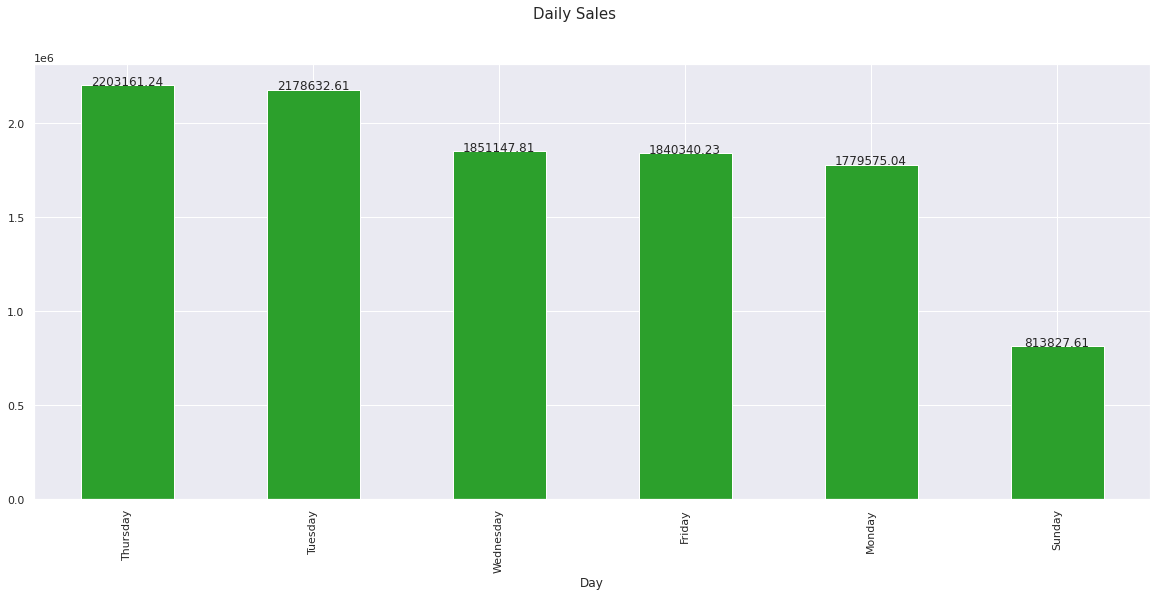

In [68]:
# Looking at Daily Sales
daily_sales = df.groupby(['Day'])['Total_Amount'].sum().sort_values(ascending=False).round(2)
fig,ax = plt.subplots(figsize=(20,8))
fig.suptitle('Daily Sales', fontsize=15)
ax = daily_sales[:].plot(kind='bar',color='tab:green')
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2, height,height ,ha="center")

#### <b> Monthly Sales
> * Following analysis will give us an overview about Monthly Sales.

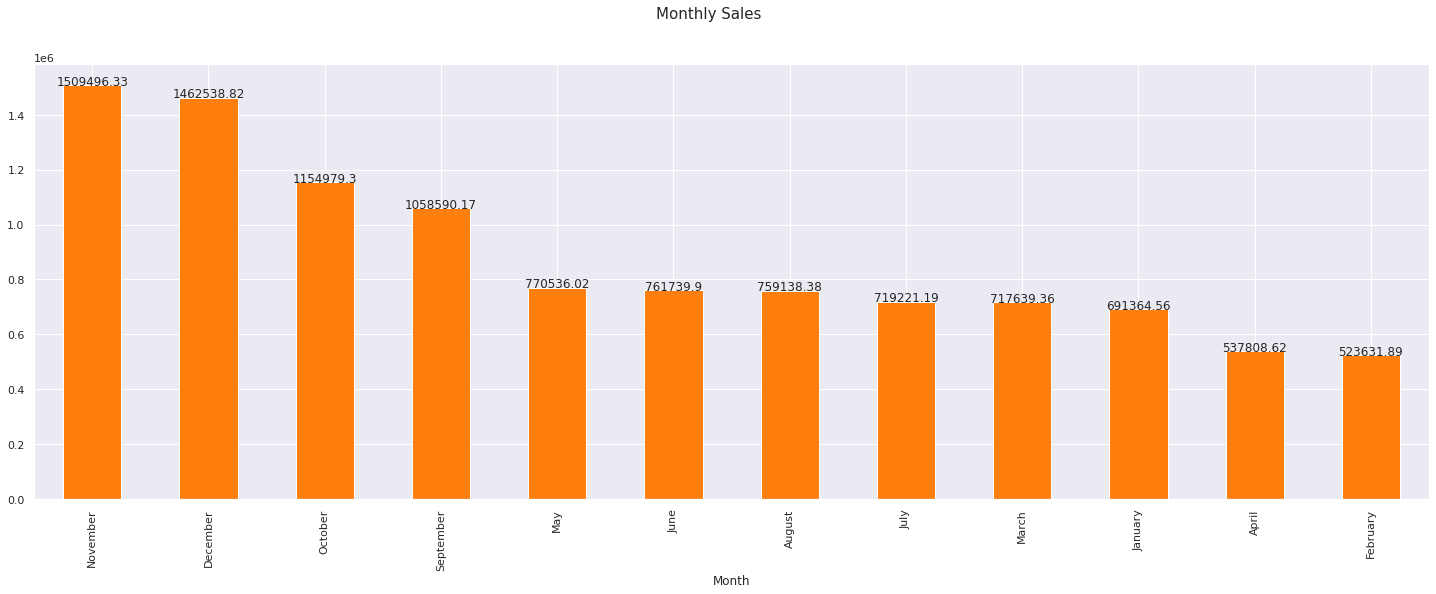

In [69]:
# Looking at Monthly Sales
month_sales = df.groupby('Month')['Total_Amount'].sum().sort_values(ascending=False).round(2)
fig,ax = plt.subplots(figsize=(25,8))
fig.suptitle('Monthly Sales', fontsize=15)
ax = month_sales[:].plot(kind='bar',color='tab:orange')
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2, height,height ,ha="center")

#### <b> Yearly Sales
> * Following analysis will give us an overview about Yearly Sales.

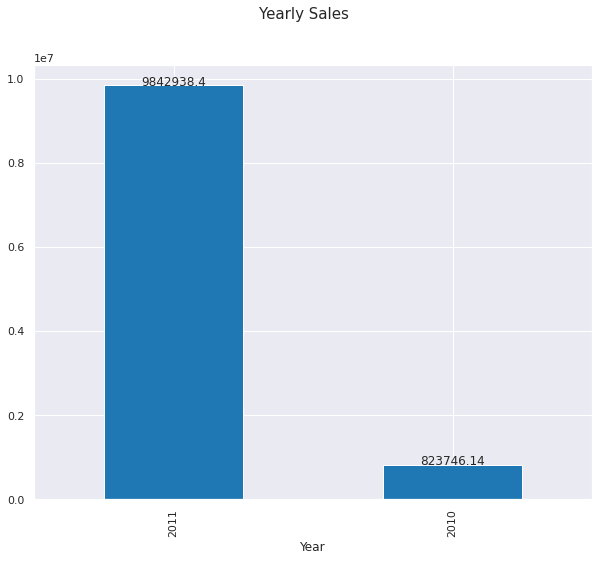

In [70]:
# Looking at Yearly Sales
year_sales = df.groupby('Year')['Total_Amount'].sum().sort_values(ascending=False).round(2)
fig,ax = plt.subplots(figsize=(10,8))
fig.suptitle('Yearly Sales', fontsize=15)
ax = year_sales[:].plot(kind='bar',color='tab:blue')
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2, height,height ,ha="center")

#### <b> Hourly Sales
> * Following analysis will give us an overview about Hourly Sales.

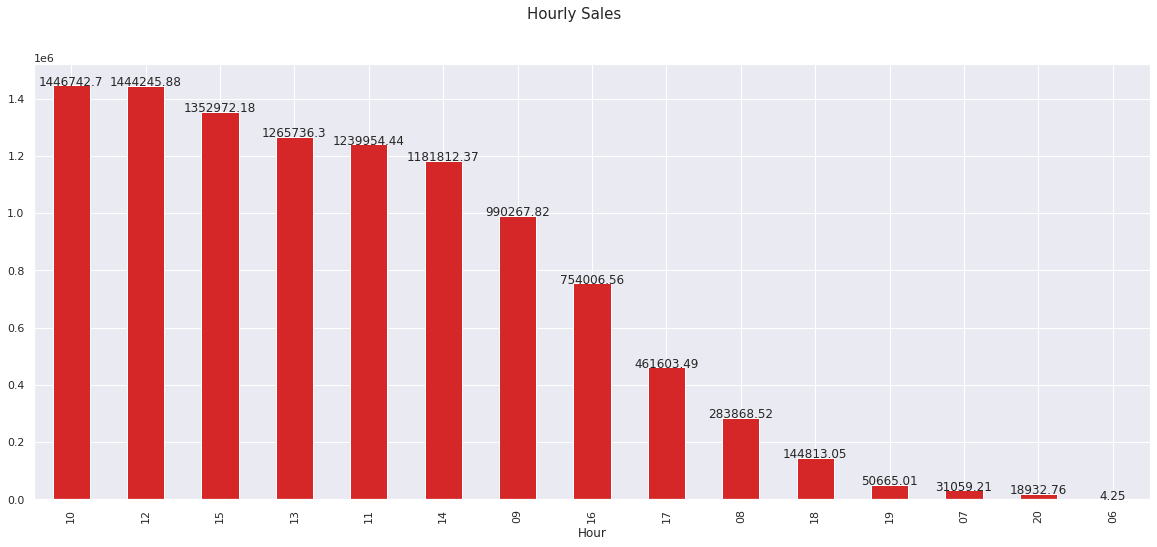

In [71]:
# Looking at Hourly Sales
hour_sales = df.groupby('Hour')['Total_Amount'].sum().sort_values(ascending=False).round(2)
fig,ax = plt.subplots(figsize=(20,8))
fig.suptitle('Hourly Sales', fontsize=15)
ax = hour_sales[:].plot(kind='bar',color='tab:red')
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2, height,height ,ha="center")

# <b> Unsupervised ML Analysis - Customer Segmentation

---
>In ecommerce companies like online retails, customer segmentation is necessary in order to understand customers behaviors. It leverages acquired customer transactions data in order to divide customers into groups.
>
>Our goal is to cluster our customers to get insights in:
>
>* Increasing revenue (Knowing customers who contribute most of our revenue)
>* Increasing customer retention
>* Discovering Trends and patterns
>* Defining customers at risk
>
>We will do RFM Analysis as a first step and then combine RFM with predictive algorithms (k-means).


## <b> Statistical Analysis - RFM Analysis and Segmentation

---
>RFM (Recency, Frequency, Monetary) analysis is a customer segmentation technique that uses past purchase behavior to divide customers into groups. RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.
>
>* RECENCY (R): Days since last purchase
>* FREQUENCY (F): Total number of purchases
>* MONETARY VALUE (M): Total money this customer spent. We will create those 3 customer attributes for each customer.


### <b> RFM Modelling

In [72]:
# Adding recent date to the dataset. This is to calculate the number of days from recent purchase
Recent = df['InvoiceDate'].max()+dt.timedelta(1)
print(Recent)

# Create RFM Modelling scores for each customer
rfm_data = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Recent - x.max() ).days, # Recency
                                        'InvoiceNo': lambda x: len(x),                      # Frequency
                                        'Total_Amount': lambda x: x.sum()})                   # Monetary

# Convert Invoice Date into type int
rfm_data['InvoiceDate'] = rfm_data['InvoiceDate'].astype(int)

# Rename column names to Recency, Frequency and Monetary
rfm_data.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'Total_Amount': 'Monetary'}, inplace=True)

rfm_data.reset_index().head()

2011-12-10 12:50:00


CustomerID  Recency  Frequency  Monetary
0     12346.0      326          1  77183.60
1     12347.0        2        182   4310.00
2     12348.0       75         31   1797.24
3     12349.0       19         73   1757.55
4     12350.0      310         17    334.40

* CustomerID 12346 has frequency: 1, monetary value: $77183.60 and recency: 326 days.

* CustomerID 12747 has frequency: 103, monetary value: $4196.01 and recency: 2 days.

#### <b> RFM Outliers

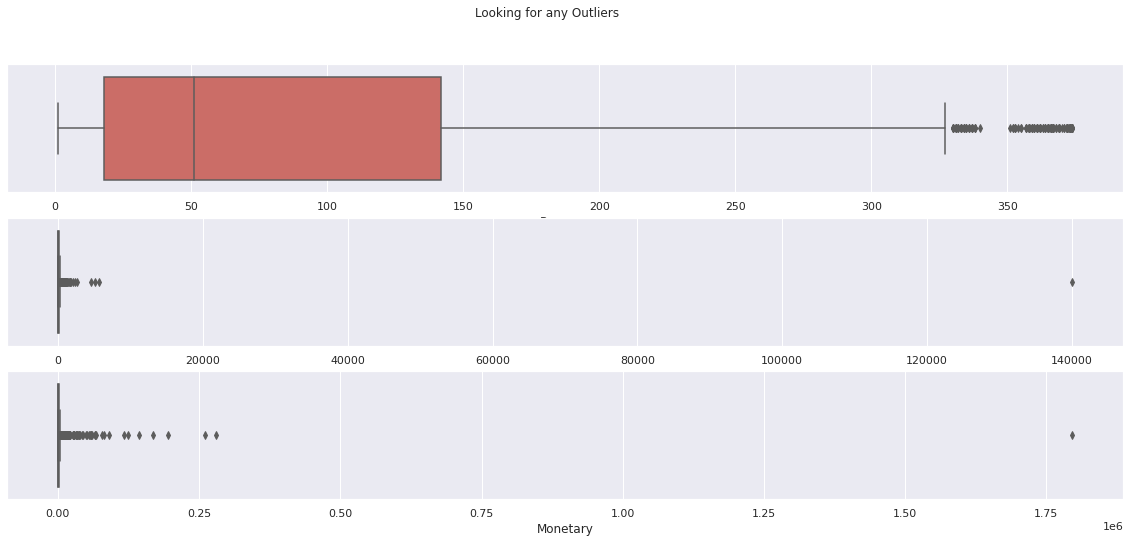

In [73]:
# Plot Recency, Freqiency and Moneatry 
fig,ax=plt.subplots(3,1,figsize = (20,8))
fig.suptitle('Looking for any Outliers', fontsize = 12)
sns.boxplot(x='Recency',data=rfm_data,ax=fig.axes[0],palette='hls')
sns.boxplot(x='Frequency',data=rfm_data,ax=fig.axes[1],palette='hls')
sns.boxplot(x='Monetary',data=rfm_data,ax=fig.axes[2],palette='hls')

#### <b> Recency Distribution Visualization

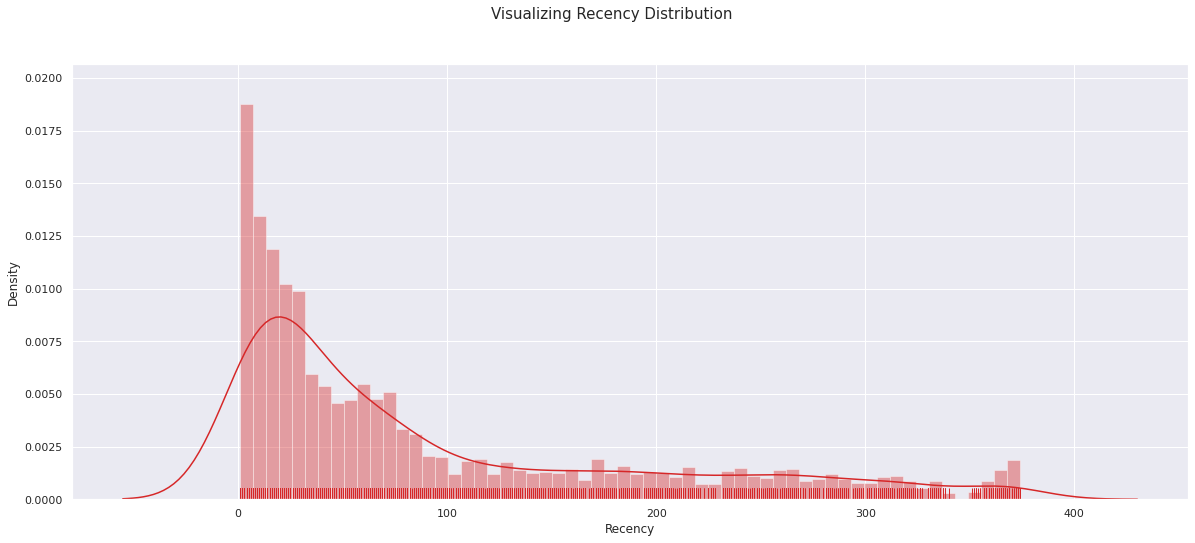

In [74]:
# Visualizing Recency Distribution
fig,ax = plt.subplots(figsize=(20,8))
sns.set_theme(style='darkgrid')
fig.suptitle('Visualizing Recency Distribution', fontsize=15)
rec = rfm_data['Recency']
ax = sns.distplot(rec,bins=60,hist=True,kde=True,rug=True,color='tab:red')

#### <b> Frequency Distribution Visualization

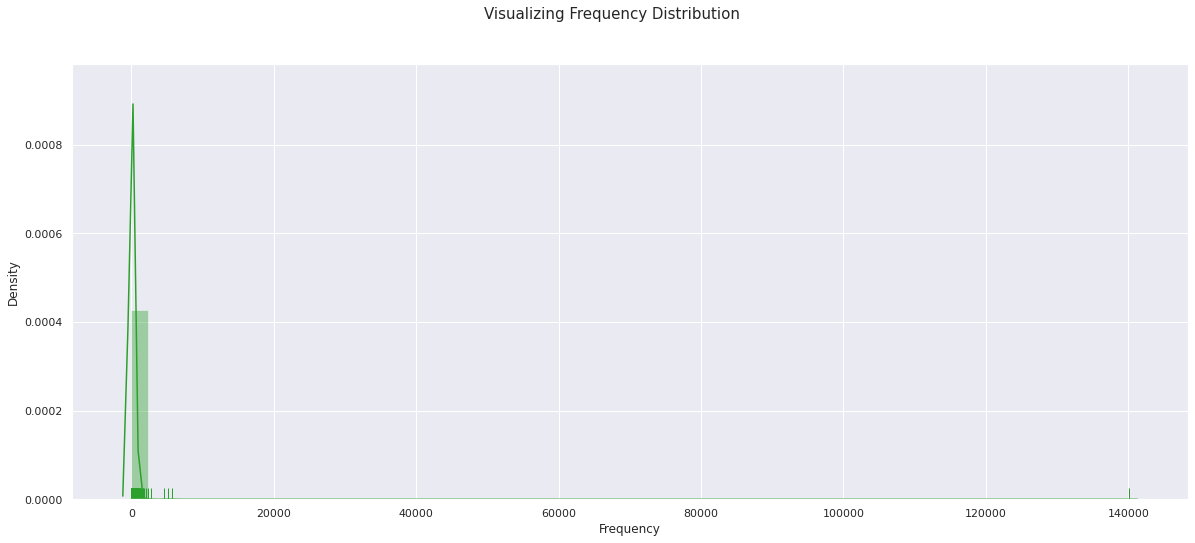

In [75]:
# Visualizing Frequency Distribution
fig,ax = plt.subplots(figsize=(20,8))
sns.set_theme(style='darkgrid')
fig.suptitle('Visualizing Frequency Distribution', fontsize=15)
rec = rfm_data['Frequency']
ax = sns.distplot(rec,bins=60,hist=True,kde=True,rug=True,color='tab:green')

#### <b> Monetary Distribution Visualization

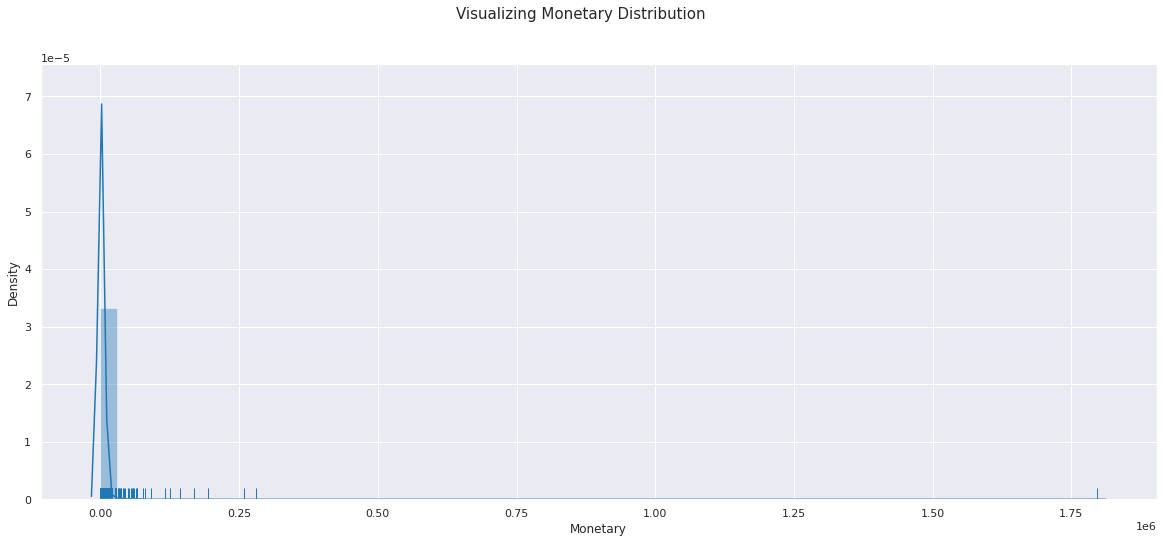

In [76]:
# Visualizing Monetary Distribution
fig,ax = plt.subplots(figsize=(20,8))
sns.set_theme(style='darkgrid')
fig.suptitle('Visualizing Monetary Distribution', fontsize=15)
rec = rfm_data['Monetary']
ax = sns.distplot(rec,bins=60,hist=True,kde=True,rug=True,color='tab:blue')

#### <b> Correlational Analysis on RFM

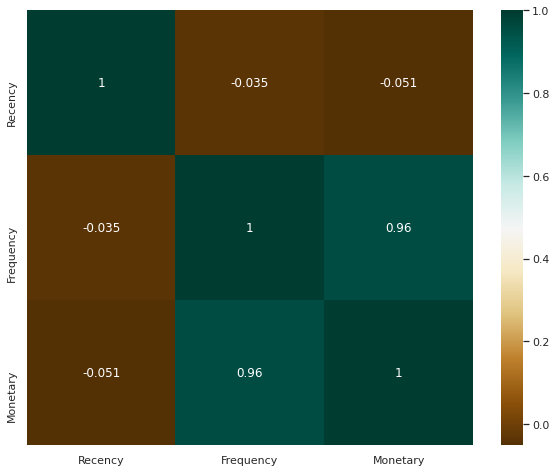

In [77]:
# Looking into the Correlation of RFM 
heatmap = rfm_data[['Recency','Frequency','Monetary']].corr()
fig.ax = plt.subplots(figsize=(10,8))
fig.suptitle('Correlation Analysis between Recency, Frequency and Monetary',fontsize=12)
ax = sns.heatmap(data=heatmap,cmap="BrBG",annot=True)
plt.show()

* <b> Frequency and monetary value are positively correlated with each other implying an increase in frequency implies increase in monetary value
* <b> Frequency and Recency are negatively correlated with each other implying an increase in frequency implies decrease in monetary value


### <b> RFM Segments Modelling

---
> The easiest way to split metrics into segments is by using quartile.
>* This gives us a starting point for detailed analysis
>* 4 segments are easy to understand and explain


In [78]:
# Segmenting RFM data into four quantiles
quantiles = rfm_data.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'Monetary': {0.25: 307.41499999999996,
  0.5: 674.4849999999999,
  0.75: 1661.7400000000002},
 'Recency': {0.25: 18.0, 0.5: 51.0, 0.75: 142.0}}

#### <b> Creating RFM Segments

In [79]:
# Functions to create R, F and M segments
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [80]:
# For convienence 
seg_table = rfm_data

#### <b> Segments Allocation

In [81]:
# Assigning segments to customers
seg_table['R'] = seg_table['Recency'].apply(RScoring, args=('Recency',quantiles,))
seg_table['F'] = seg_table['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
seg_table['M'] = seg_table['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
seg_table.head()

Recency  Frequency  Monetary  R  F  M
CustomerID                                       
12346.0         326          1  77183.60  4  4  1
12347.0           2        182   4310.00  1  1  1
12348.0          75         31   1797.24  3  3  1
12349.0          19         73   1757.55  2  2  1
12350.0         310         17    334.40  4  4  3

#### <b> Calculating RFM Groups and Scores

In [82]:
# Adding RFMGroup value column showing combined concatenated score of RFM
seg_table['RFMGroup'] = seg_table.R.map(str) + seg_table.F.map(str) + seg_table.M.map(str)

# Adding RFMScore value column showing total sum of RFMGroup values
seg_table['RFMScore'] = seg_table[['R', 'F', 'M']].sum(axis = 1)
seg_table.head()

Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore
CustomerID                                                          
12346.0         326          1  77183.60  4  4  1      441         9
12347.0           2        182   4310.00  1  1  1      111         3
12348.0          75         31   1797.24  3  3  1      331         7
12349.0          19         73   1757.55  2  2  1      221         5
12350.0         310         17    334.40  4  4  3      443        11

In [83]:
# Let's remove customer with zero monetary value
# Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num

# Apply handle_neg_n_zero function to Recency and Monetary columns 
seg_table['Recency'] = [handle_neg_n_zero(x) for x in seg_table.Recency]
seg_table['Monetary'] = [handle_neg_n_zero(x) for x in seg_table.Monetary]

In [84]:
# Perform log transformation
seg_table_log = np.log(seg_table[['Recency','Frequency','Monetary']]+1)
seg_table_log.head()

Recency  Frequency   Monetary
CustomerID                                
12346.0     5.789960   0.693147  11.253955
12347.0     1.098612   5.209486   8.368925
12348.0     4.330733   3.465736   7.494564
12349.0     2.995732   4.304065   7.472245
12350.0     5.739793   2.890372   5.815324

### <b> Customer Segmentation based on RFM Analysis

---
> We can able to broadly classify the customers into 4 types based on the RFM Analysis. They are as follows:
> * Best Customers
> * Loyal Customers
> * New Customers
> * Lost Customers


#### <b> Best Customers

---
> * These are the customers that bought recently, buy often and spend a lot. It’s likely that they will continue to do so.
> * Since they already like you so much, consider marketing to them without price incentives to preserve your profit margin.
> * Be sure to tell these customers about new products you carry, how to connect on social networks, and any loyalty programs or social media incentives you run.


In [85]:
# Identifying at Best Customer
seg_table[seg_table['RFMGroup']=='111'].sort_values('Monetary', ascending=False).head()

Recency  Frequency    Monetary  R  F  M RFMGroup  RFMScore
CustomerID                                                            
17841.0           1     140067  1796268.21  1  1  1      111         3
14646.0           2       2076   280206.02  1  1  1      111         3
18102.0           1        431   259657.30  1  1  1      111         3
17450.0           8        337   194550.79  1  1  1      111         3
14911.0           1       5675   143825.06  1  1  1      111         3

#### <b> Loyal Customers

---
> * Anyone with a high frequency should be considered loyal. 
> * This doesn’t mean they have necessarily bought recently, or that they spent a lot, though you could define that with your R and M factors.


In [86]:
# Identifying Loyal Customers
seg_table[seg_table['R']==1].sort_values('Frequency', ascending=False).head()

Recency  Frequency    Monetary  R  F  M RFMGroup  RFMScore
CustomerID                                                            
17841.0           1     140067  1796268.21  1  1  1      111         3
14911.0           1       5675   143825.06  1  1  1      111         3
14096.0           4       5111    65164.79  1  1  1      111         3
12748.0           1       4595    33719.73  1  1  1      111         3
14606.0           1       2700    12156.65  1  1  1      111         3

#### <b> New Customers

---
> * New Spenders are new customers that spent a lot of money on their first order(s). 
> * This is the kind of customer you want to convert into a loyal, regular customer that loves your products and brand. 
> * Be sure to welcome them and thank them for making a first purchase, and follow it up with unique incentives to come back again.

In [87]:
# Identifying New Customers
seg_table[seg_table['RFMGroup']=='141'].sort_values('Monetary', ascending=False).head()

Recency  Frequency   Monetary  R  F  M RFMGroup  RFMScore
CustomerID                                                           
16446.0           1          3  168472.50  1  4  1      141         6
16000.0           3          9   12393.70  1  4  1      141         6
12798.0          10          8    6977.04  1  4  1      141         6
16532.0          18          4    6748.80  1  4  1      141         6
15195.0           3          1    3861.00  1  4  1      141         6

#### <b> Lost Customers

---
> * Lost Customers used to buy frequently from you, and at one point they spent a lot with you, but they’ve stopped. Now it’s time to win them back.
> * They might be lost to a competitor; they might not have need of your products anymore, or they might have had a bad customer service experience with you.


In [88]:
# Identifying Lost Customers
seg_table[seg_table['RFMGroup']=='411'].sort_values('Monetary', ascending=False).head()

Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore
CustomerID                                                          
13093.0         276        159   7832.47  4  1  1      411         6
17850.0         372        297   5391.21  4  1  1      411         6
14016.0         162        161   4341.21  4  1  1      411         6
15808.0         306        208   3734.97  4  1  1      411         6
15379.0         169        194   3703.29  4  1  1      411         6

## <b> Data Preprocessing

In [89]:
# Standardize the recency, frequency, monetary values
scaler = StandardScaler()
scaler.fit(seg_table_log)

# Scale and center the data
seg_table_log_normal = scaler.transform(seg_table_log)

# Create a pandas DataFrame
seg_table_log_normalized = pd.DataFrame(data=seg_table_log_normal, index=seg_table_log.index, columns=seg_table_log.columns)

In [90]:
X = seg_table_log_normal

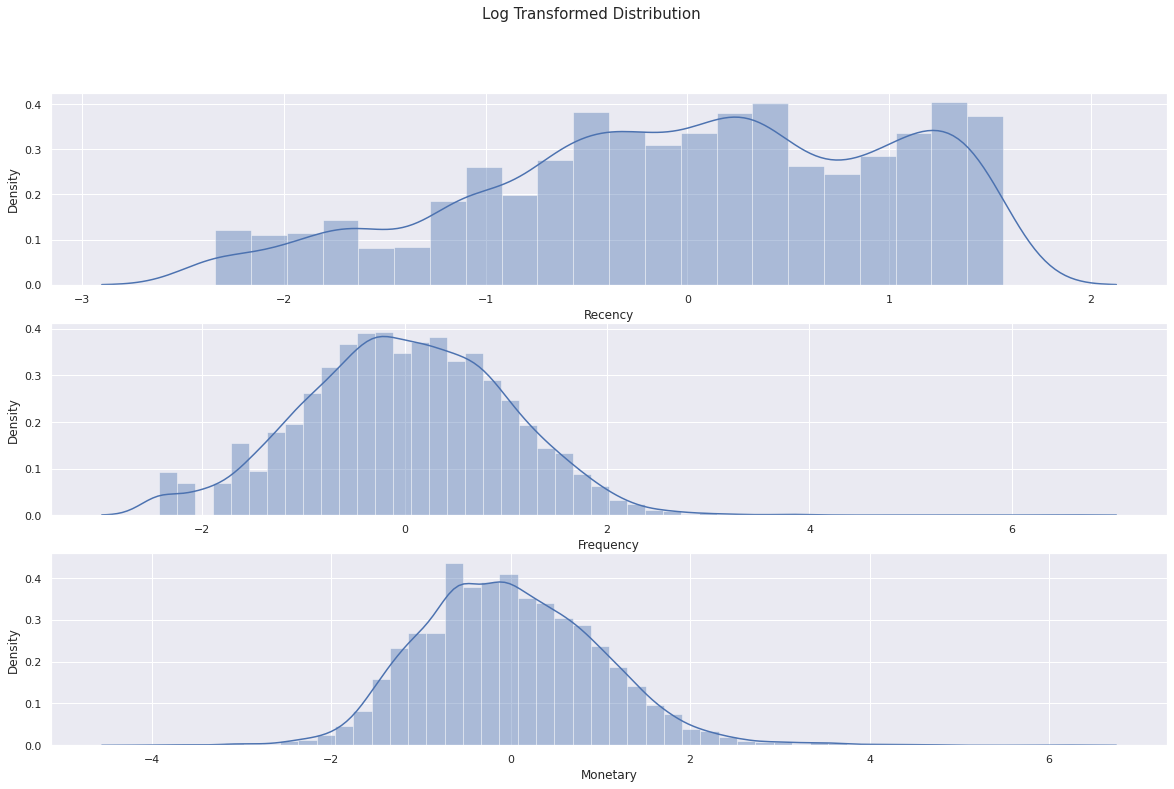

In [91]:
# Plot distributions after log normalization
fig,ax = plt.subplots(3,1,figsize=(20,12))
sns.set_theme(style='darkgrid')
fig.suptitle('Log Transformed Distribution',fontsize=15)
sns.distplot(seg_table_log_normalized['Recency'],ax = ax[0])
sns.distplot(seg_table_log_normalized['Frequency'],ax = ax[1])
sns.distplot(seg_table_log_normalized['Monetary'],ax = ax[2])

* Once log transformation and standardization are performed all three distributions become symmetric.

## <b> Machine Learning Analysis - Clustering and Segmentation.

---
>* Unsupervised learning refers to the use of machine learning algorithms to identify patterns in data sets containing data points that are neither classified nor labeled.
>* The algorithms are thus allowed to classify, label and/or group the data points contained within the data sets without having any external guidance in performing that task.
>* In other words, unsupervised learning allows the system to identify patterns within data sets on its own.


### <b> K-Means Clustering

---
>* It is the simplest and commonly used iterative type unsupervised learning algorithm.
>* In this, we randomly initialize the K number of centroids in the data (the number of k is found using the Elbow method which will be discussed later in this article ) and iterates these centroids until no change happens to the position of the centroid.
>* Let’s go through the steps involved in K means clustering for a better understanding.


#### <b> Initial K-Means Modelling

---

> Initiating K-Means Model by appling values to n_clusters = 5

In [139]:
# Initial K-Means Modelling
In_km = KMeans(n_clusters = 5,
               max_iter=3000, init='random')                        # Model Initializing Phase
In_km.fit(X)                                                        # Model Training Phase
y_Inkm = In_km.predict(X)                                           # Model Predicting Phase
print('Initial K-Means Model implemented Successfully :)')
print('-----------------------------------------------------')
n = 5
IKcluster = KMeans(n_clusters=n)
Ikmpreds = IKcluster.fit_predict(X)
Ikm_score = silhouette_score(X,Ikmpreds)
print("For n_clusters = {}, silhouette score is {}".format(n, Ikm_score))

Initial K-Means Model implemented Successfully :)
-----------------------------------------------------
For n_clusters = 5, silhouette score is 0.2764048272391784


#### <b> Initial K-Means Model Visualization

---

> Visualing initial K-Means Model

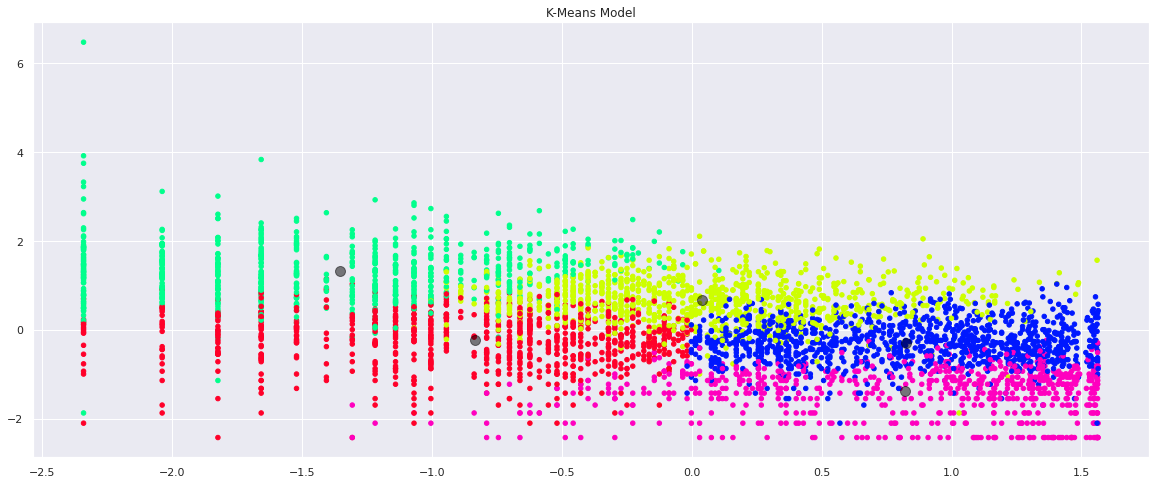

In [93]:
# Visualizing Initial K-Means Model
plt.figure(figsize=(20,8))
plt.title('K-Means Model', fontsize = 12)
#colors = ['tab:blue','tab:orange','tab:pink','tab:olive','tab:brown']
plt.scatter(X[:, 0], X[:, 1], c=y_Inkm, s=20, cmap='gist_rainbow')
centers = In_km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5);

#### <b> Hyperparameter Tuning

---
> Parameters which define the model architecture are referred to as hyperparameters and thus this process of searching for the ideal model architecture is referred to as hyperparameter tuning.
>* Here the Parameters, we are tuning is **n_clusters** or **Number of Clusters** 

##### <b> Elbow Method

---
>In the Elbow method, we are actually varying the number of clusters ( K ) from 2 – 20. For each value of K, we are calculating WCSS ( Within-Cluster Sum of Square ). WCSS is the sum of squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 2. When we analyze the graph we can see that the graph will rapidly change at a point and thus creating an elbow shape. From this point, the graph starts to move almost parallel to the X-axis. The K value corresponding to this point is the optimal K value or an optimal number of clusters.
>
>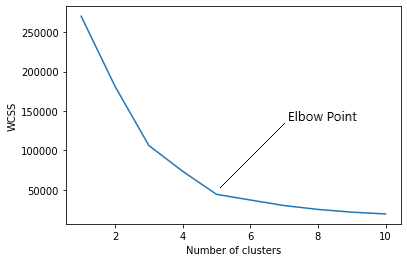

In [114]:
# Finding optimal K value using Elbow Method
sum_of_sq_dist = {}
for k in range(2,20):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_

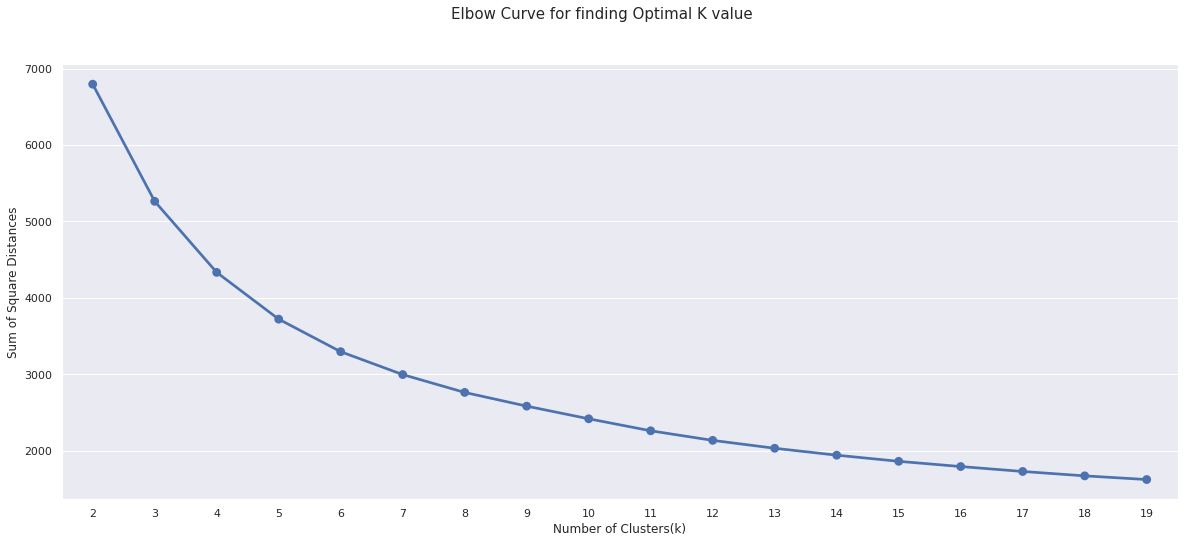

In [115]:
# Plotting the graph for the sum of square distance values and number of cluster
fig,ax = plt.subplots(figsize=(20,8))
fig.suptitle('Elbow Curve for finding Optimal K value',fontsize = 15)
sns.set_theme(style='darkgrid')
ax = sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.show()

##### <b> Silhoutte Score
---
> Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters. To calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters:
>
>* Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a.
>* Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b.
>
> The Silhouette Coefficient for a sample is $ S = \frac{(b - a)}{max(a, b)}$.


For n_clusters = 2 The average silhouette_score is : 0.39963963954799514
For n_clusters = 3 The average silhouette_score is : 0.30401324439618377
For n_clusters = 4 The average silhouette_score is : 0.3083539282742
For n_clusters = 5 The average silhouette_score is : 0.27699436270318595
For n_clusters = 6 The average silhouette_score is : 0.2734361320449349
For n_clusters = 7 The average silhouette_score is : 0.2630825180717717
For n_clusters = 8 The average silhouette_score is : 0.2593132891456492
For n_clusters = 9 The average silhouette_score is : 0.2581605319580695
For n_clusters = 10 The average silhouette_score is : 0.2580914100794136
For n_clusters = 11 The average silhouette_score is : 0.2659164712352513
For n_clusters = 12 The average silhouette_score is : 0.2649676128561247
For n_clusters = 13 The average silhouette_score is : 0.25614918491796124
For n_clusters = 14 The average silhouette_score is : 0.2515650155427262
For n_clusters = 15 The average silhouette_score is : 0.25

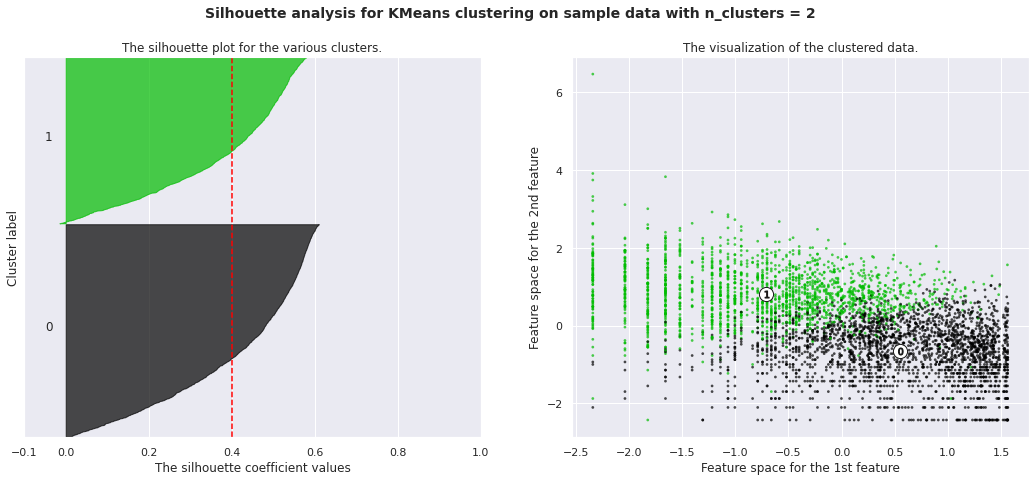

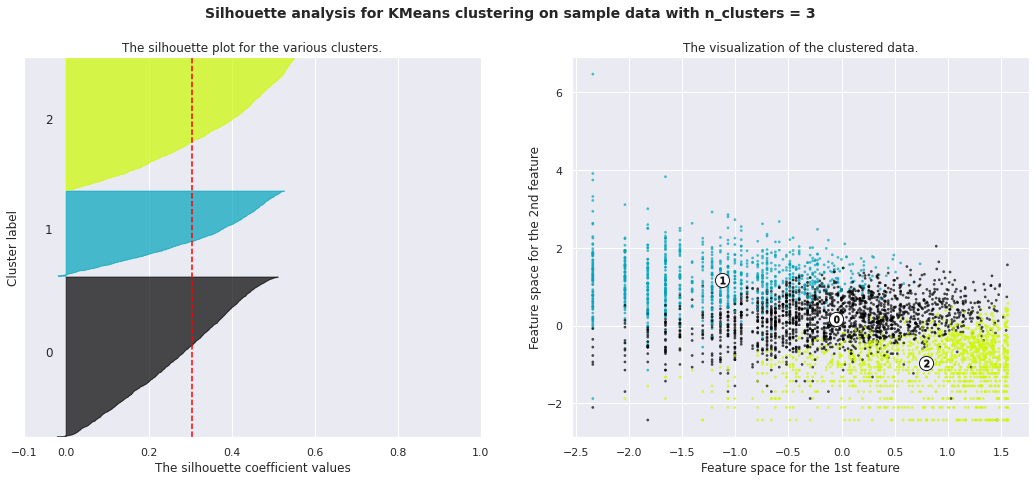

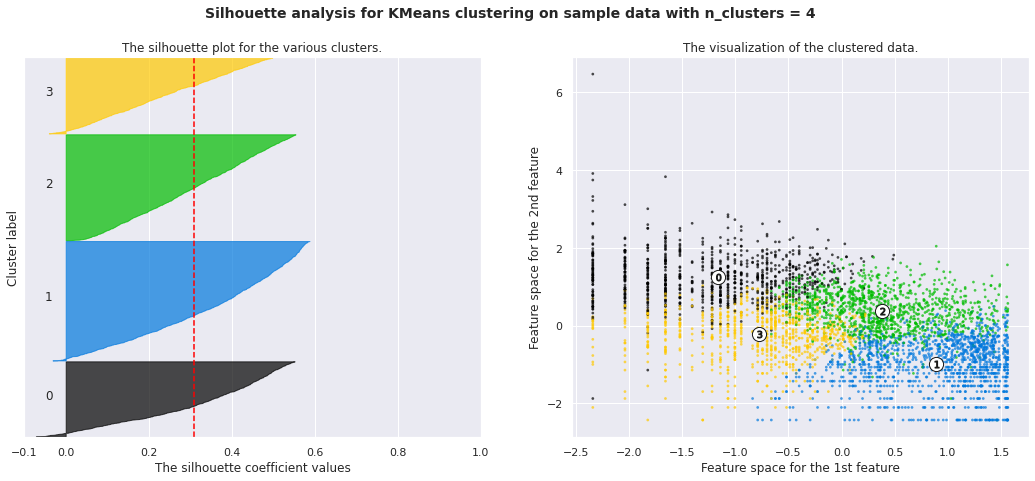

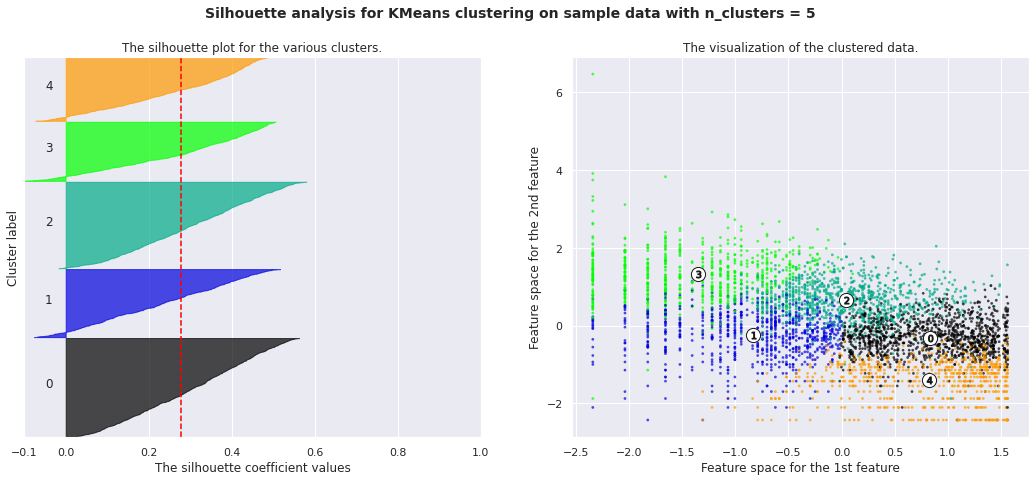

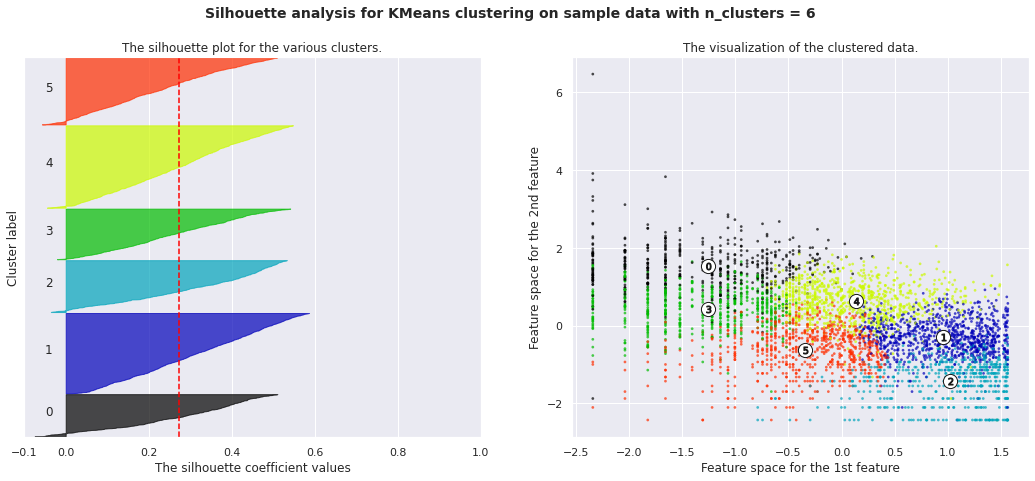

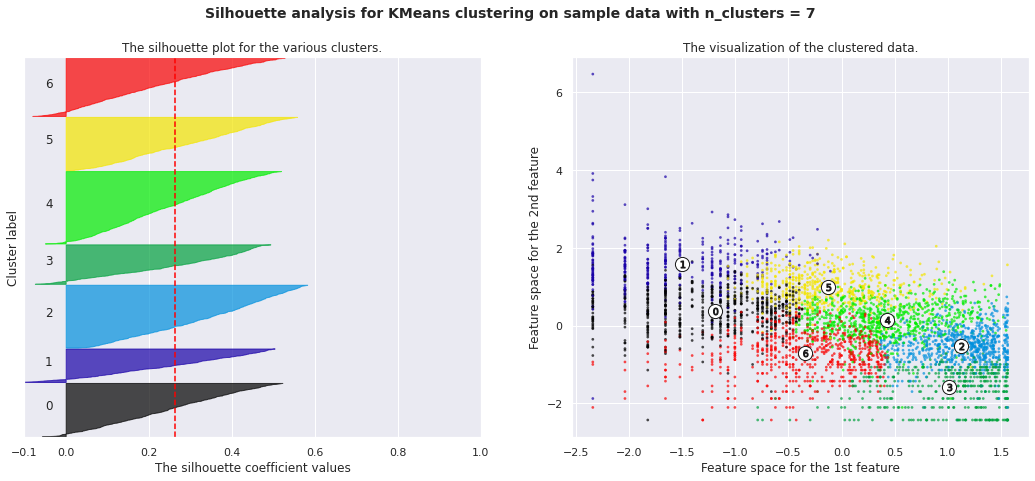

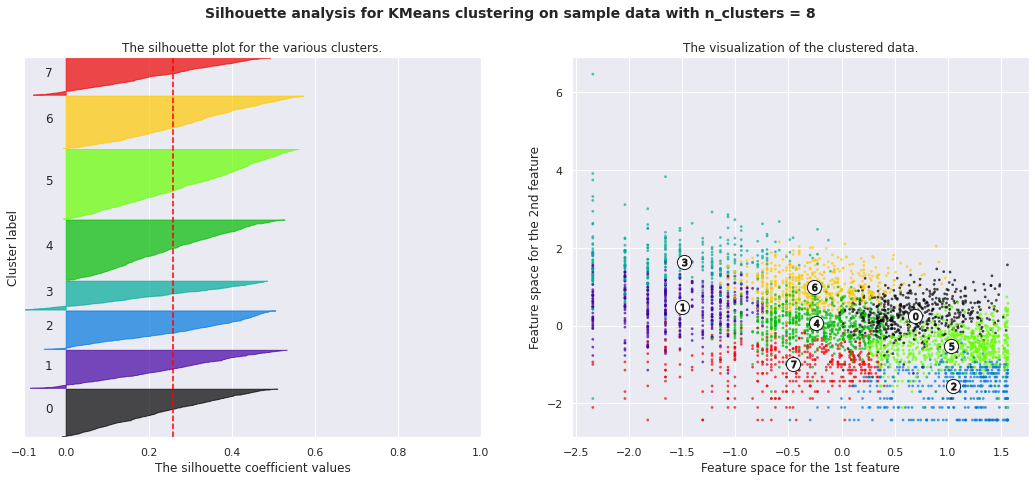

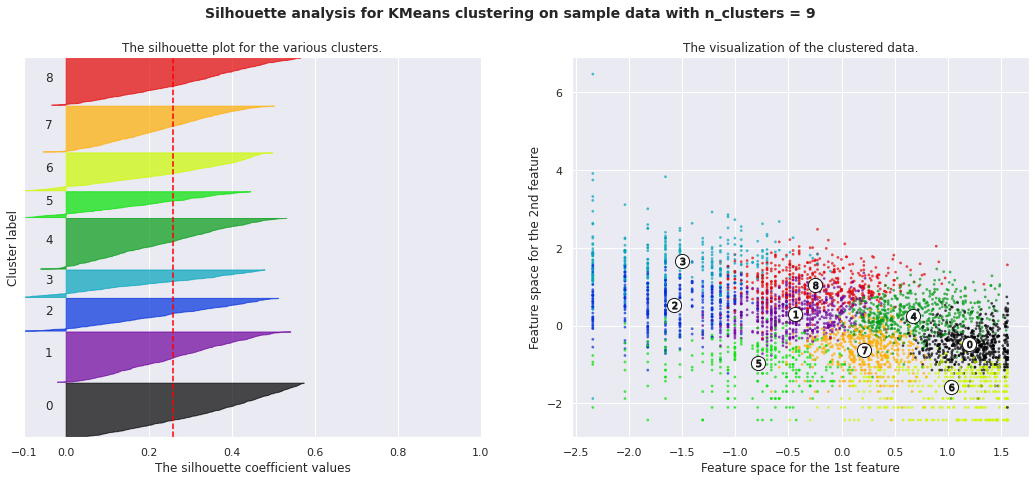

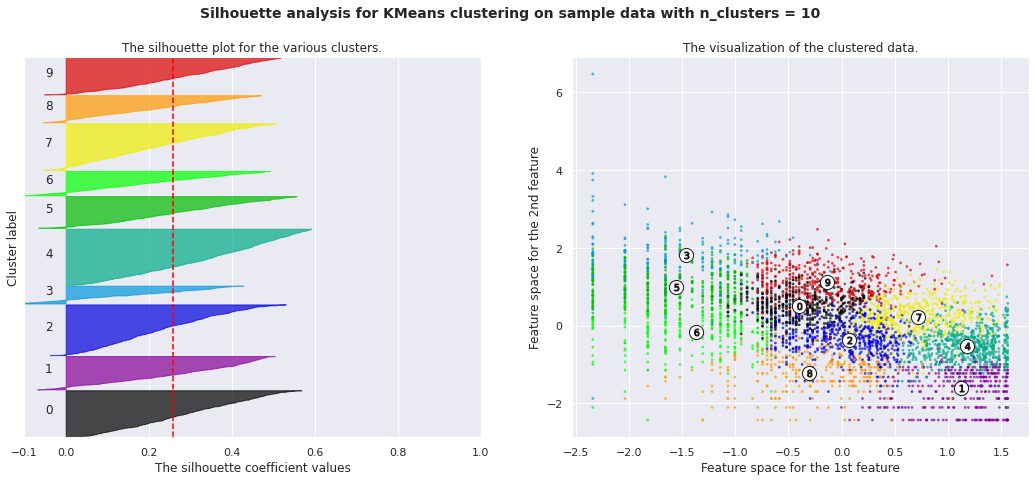

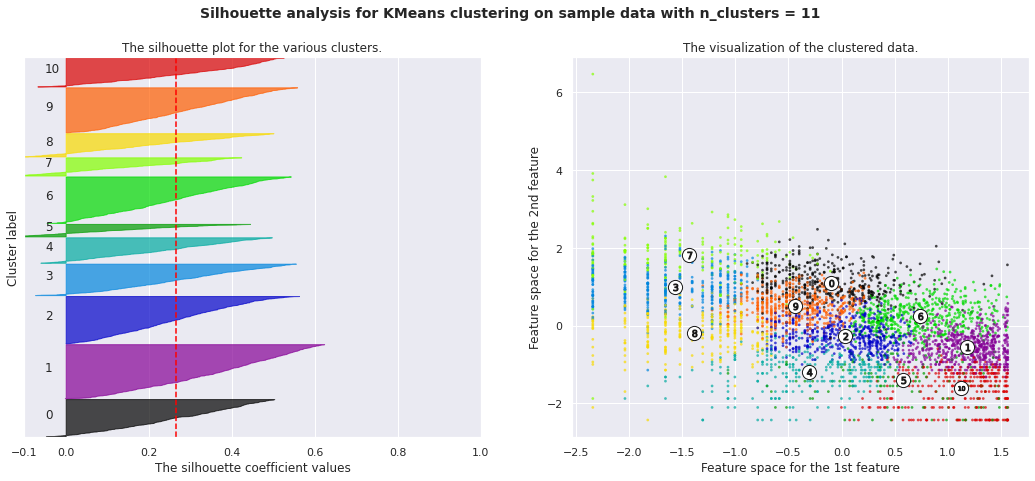

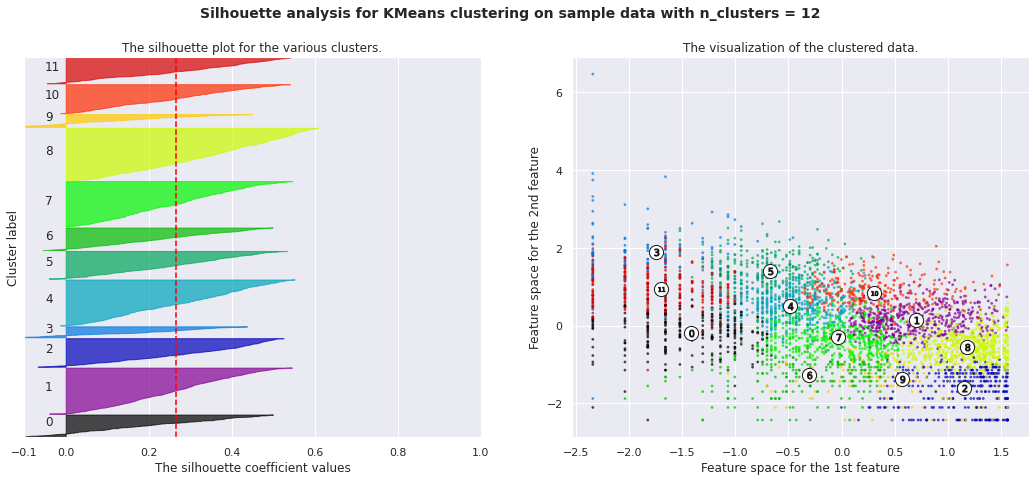

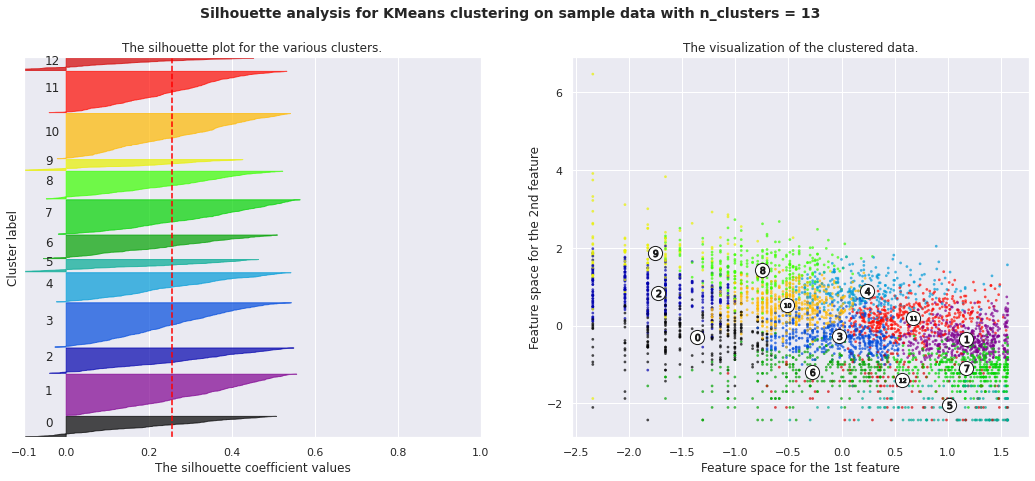

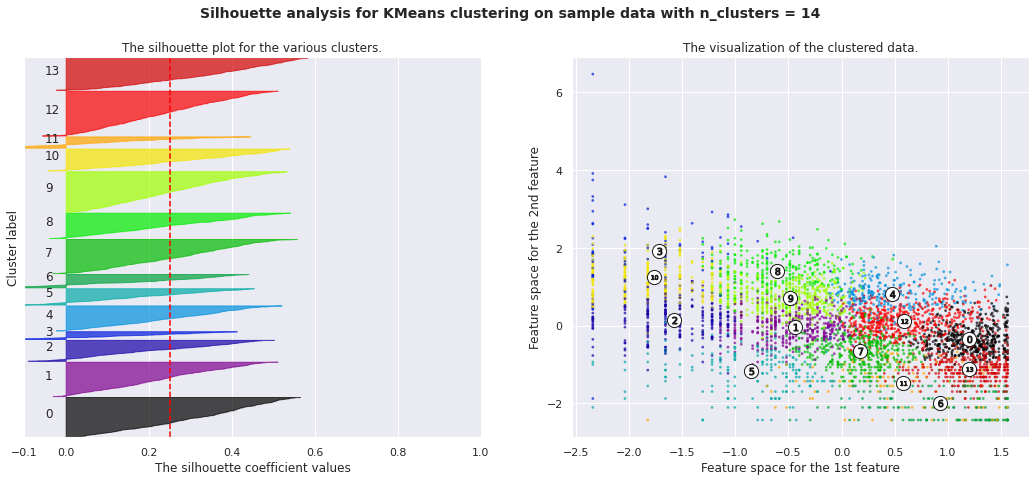

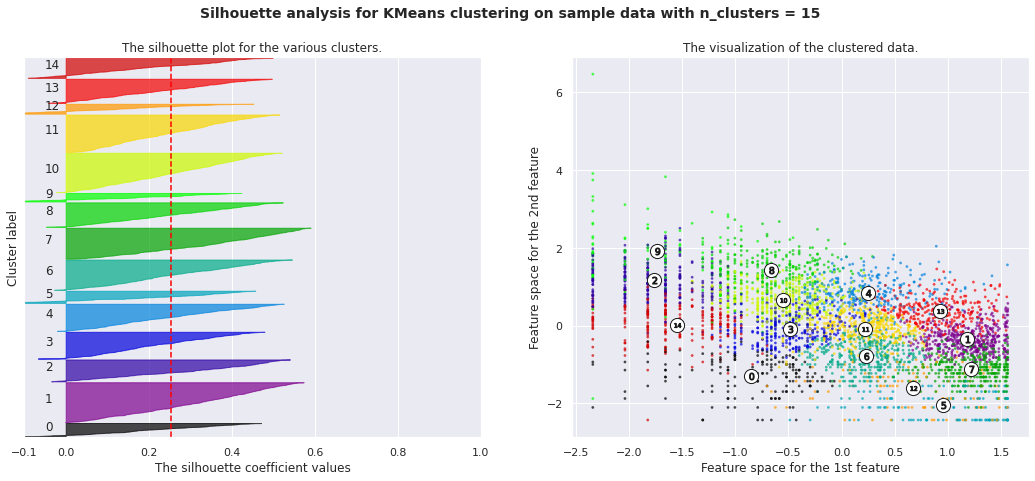

In [116]:
# Finding optimal k value using silhoutte score
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

#### <b> Final K-Means Modelling

---

> After hyperparameter tuning done on K-Means. The final modelling is implemented based on Optimal n_clusters

In [143]:
# Final K-Means Modelling
fin_km = KMeans(n_clusters = 2,
                init='k-means++',max_iter=5000)                   # Model Initializing Phase
fin_km.fit(X)                                                  # Model Training Phase
y_finkm = fin_km.predict(X)                                    # Model Predicting Phase
print('Final K-Means Model implemented Successfully :)')
print('-----------------------------------------------------')
n = 2
FKcluster = KMeans(n_clusters=n)
Fkmpreds = FKcluster.fit_predict(X)
Fkm_score = silhouette_score(X,Fkmpreds)
print("For n_clusters = {}, silhouette score is {}".format(n, Fkm_score))

Final K-Means Model implemented Successfully :)
-----------------------------------------------------
For n_clusters = 2, silhouette score is 0.39963963954799514


#### <b> Final K-Means Model Visualization

---

> Visualizing the Final K-Means Model

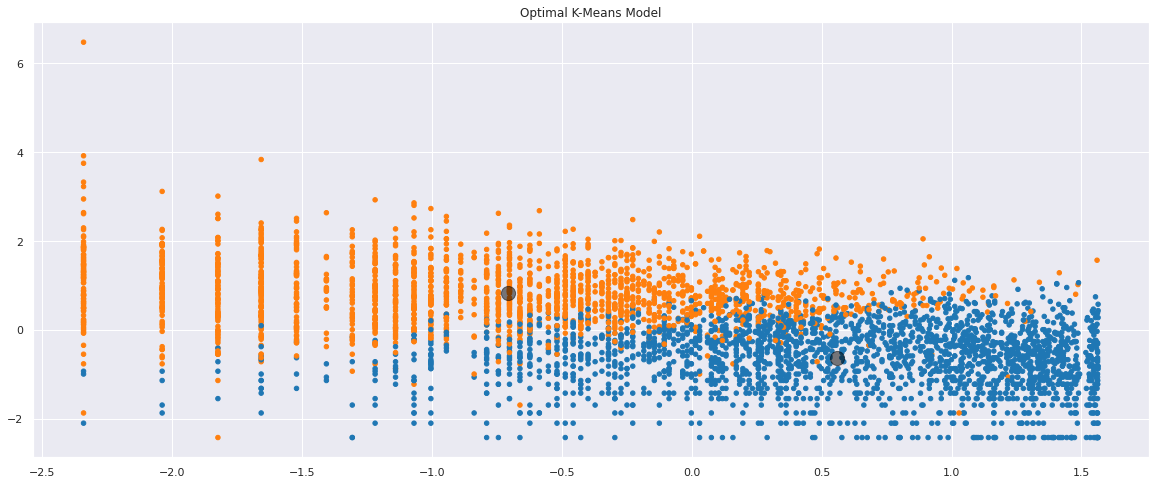

In [98]:
# Visualizing Final K-Means Model
plt.figure(figsize=(20,8))
plt.title('Optimal K-Means Model', fontsize = 12)
colors = ['tab:blue','tab:orange']
plt.scatter(X[:, 0], X[:, 1], c=y_finkm, s=20, cmap=plott.colors.ListedColormap(colors))
centers = fin_km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### <b> Agglometric Clustering

---
>* The agglomerative hierarchical clustering algorithm is a popular example of HCA.
>* To group the datasets into clusters, it follows the bottom-up approach.
>* It means, this algorithm considers each dataset as a single cluster at the beginning, and then start combining the closest pair of clusters together.
>* It does this until all the clusters are merged into a single cluster that contains all the datasets.


#### <b> Initial Agglometric Clustering

---

> Initiating Agglometric Clustering Model by appling values to n_clusters = 5, affinity = euclidean, and linkage = ward 

In [126]:
# Modelling Initial Agglometric Clustering
In_Agg = AgglomerativeClustering(n_clusters = 5, 
                                  affinity = 'euclidean', linkage = 'ward') # Model Initializing Phase 
In_Agg.fit(X)                                                               # Model Training Phase
y_InAgg = In_Agg.fit_predict(X)                                             # Model Predicting Phase    
print('Initial Agglometric Model implemented Successfully :)')
print('-----------------------------------------------------')
n = 5
IAggcluster = AgglomerativeClustering(n_clusters=n)
IAggpreds = IAggcluster.fit_predict(X)
IAgg_score = silhouette_score(X,IAggpreds)
print("For n_clusters = {}, silhouette score is {}".format(n, IAgg_score))

Initial Agglometric Model implemented Successfully :)
-----------------------------------------------------
For n_clusters = 5, silhouette score is 0.21665619222275037


#### <b> Initial Agglometric Clustering Visualization

---

> Visualing initial Agglometric Model

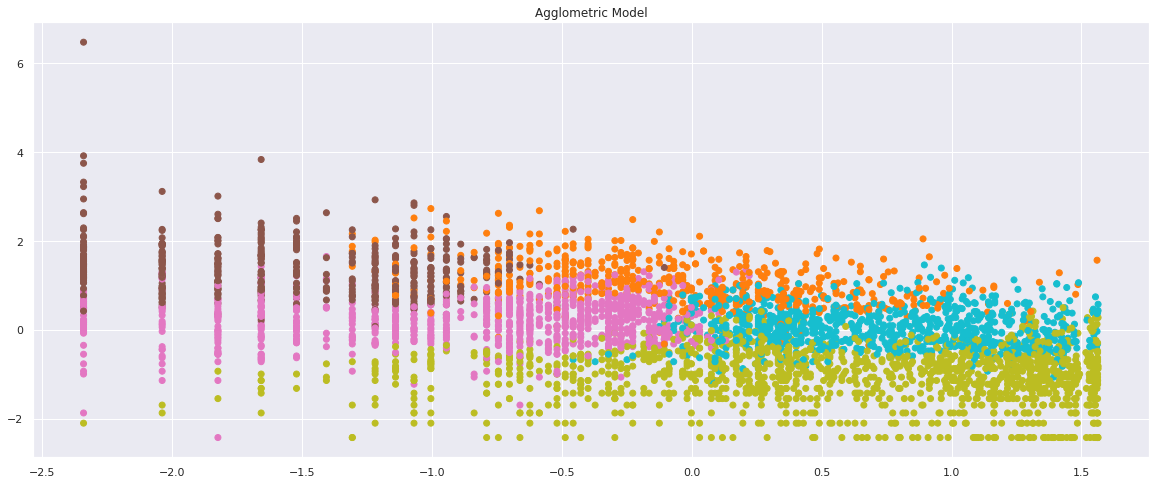

In [100]:
# Visualizing Initial Agglometric Model
plt.figure(figsize=(20,8))
colors = ['tab:olive','tab:brown','tab:pink','tab:cyan','tab:orange']
plt.scatter(X[:,0], X[:,1], c = y_InAgg, cmap = plott.colors.ListedColormap(colors))
plt.title('Agglometric Model',fontsize = 12)
plt.show()

#### <b> Hyperparameter Tuning

---
> Parameters which define the model architecture are referred to as hyperparameters and thus this process of searching for the ideal model architecture is referred to as hyperparameter tuning.
>* Here by plotting Dendogram Chart. We could able to see how many No.of.Cluster or n_clusters


##### <b> Dendogram

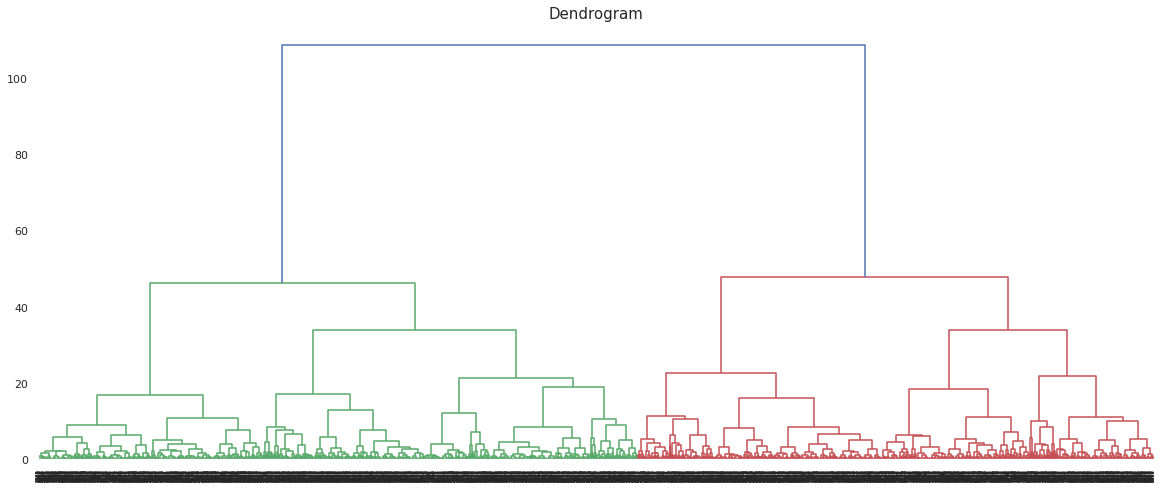

In [101]:
# Plotting Dendogram Chart
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'),orientation='top')
plt.title('Dendrogram',fontsize = 15)
plt.show()

##### <b> Dendogram Splitting

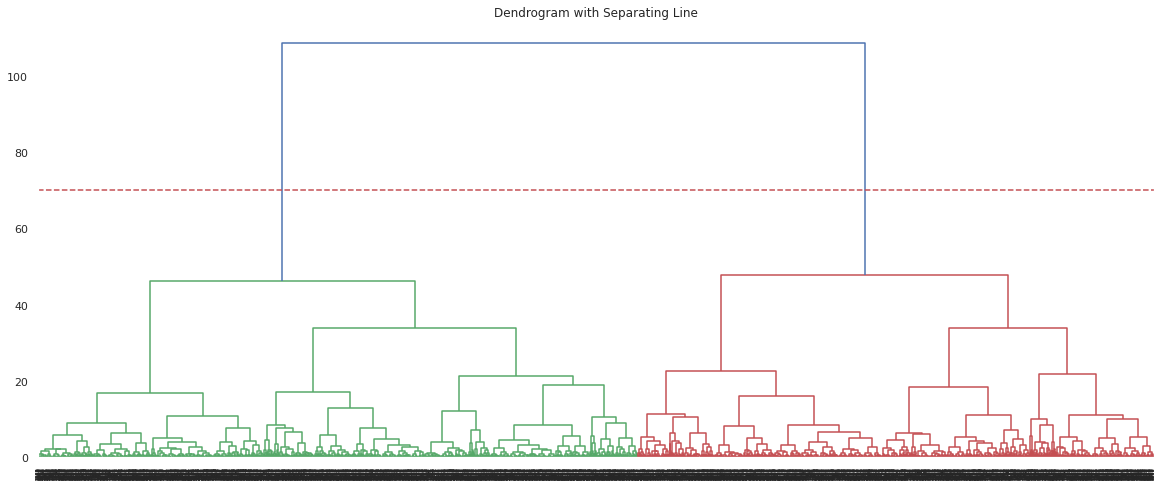

In [102]:
# Splitting Dendogram lines
plt.figure(figsize=(20,8))
dendrogram_line = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram with Separating Line',fontsize = 12)
plt.axhline(y=70, color='r', linestyle='--')
plt.show()

#### <b>Final Agglometric Modelling

---

> After hyperparameter tuning done on Agglometric Clustering. The final modelling is implemented based on Optimal n_clusters

In [127]:
# Modelling Final Agglometric Clustering
fin_Agg = AgglomerativeClustering(n_clusters = 3, 
                                  affinity = 'euclidean', linkage = 'ward') # Model Initializing Phase 
fin_Agg.fit(X)                                                              # Model Training Phase
y_finAgg = fin_Agg.fit_predict(X)                                           # Model Predicting Phase    
print('Final Agglometric Model implemented Successfully :)')
print('-----------------------------------------------------')
n = 3
FAggcluster = AgglomerativeClustering(n_clusters=n)
FAggpreds = FAggcluster.fit_predict(X)
FAgg_score = silhouette_score(X,FAggpreds)
print("For n_clusters = {}, silhouette score is {}".format(n, FAgg_score))

Final Agglometric Model implemented Successfully :)
-----------------------------------------------------
For n_clusters = 3, silhouette score is 0.25353960796454694


#### <b>Final Agglometric Model Visualization

---

> Visualizing the Final Agglometric Model

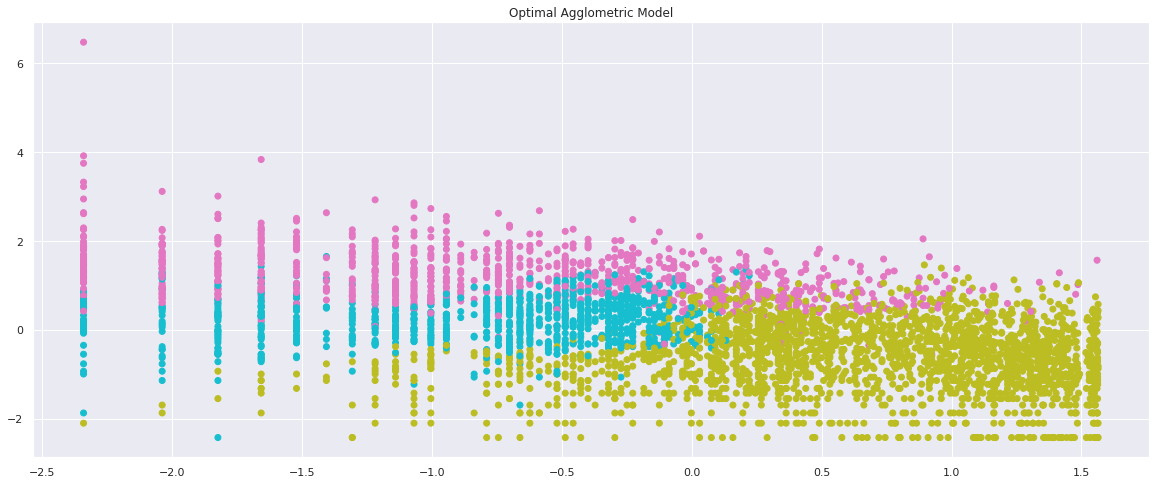

In [104]:
# Visualizing Final Agglometric Model
plt.figure(figsize=(20,8))
colors = ['tab:olive','tab:brown','tab:pink','tab:cyan']
plt.scatter(X[:,0], X[:,1], c = y_finAgg, cmap = plott.colors.ListedColormap(colors))
plt.title('Optimal Agglometric Model',fontsize = 12)
plt.show()

### <b> DBSCAN Clustering

---
>* DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise. 
>* This technique is one of the most common clustering algorithms which works based on density of object. 
>* The whole idea is that if a particular point belongs to a cluster, it should be near to lots of other points in that cluster.
>* It works based on two parameters: Epsilon and Minimum Points.
>* Epsilon determine a specified radius that if includes enough number of points within, we call it dense area
minimumSamples determine the minimum number of data points we want in a neighborhood to define a cluster.


#### <b> Initial DBSCAN Modelling

---


> Initiating DBSCAN Model by appling random values to Epsilon and Min_Samples

In [128]:
# Initial DBSCAN Modelling
In_dbs = DBSCAN(eps=0.1, min_samples=5)                    # Model Initiating Phase
In_dbs.fit(X)                                              # Model Training Phase
y_Indbs = In_dbs.fit_predict(X)                            # Model Predicting Phase
print('Initial DBSCAN Model is Fitted Successfully :)')
print('-----------------------------------------------------')
e = 0.1
ms = 5
IDBScluster = DBSCAN(eps=e,min_samples=ms)
IDBSpreds = IDBScluster.fit_predict(X)
IDBS_score = silhouette_score(X,IDBSpreds)
print("For Epsilon = {}, Minimum Sample = {} , silhouette score is {}".format(e, ms, IDBS_score))

Initial DBSCAN Model is Fitted Successfully :)
-----------------------------------------------------
For Epsilon = 0.1, Minimum Sample = 5 , silhouette score is -0.5341326102457744


#### <b> Initial DBSCAN Model Visualization

---
> Visualing initial DBSCAN Model


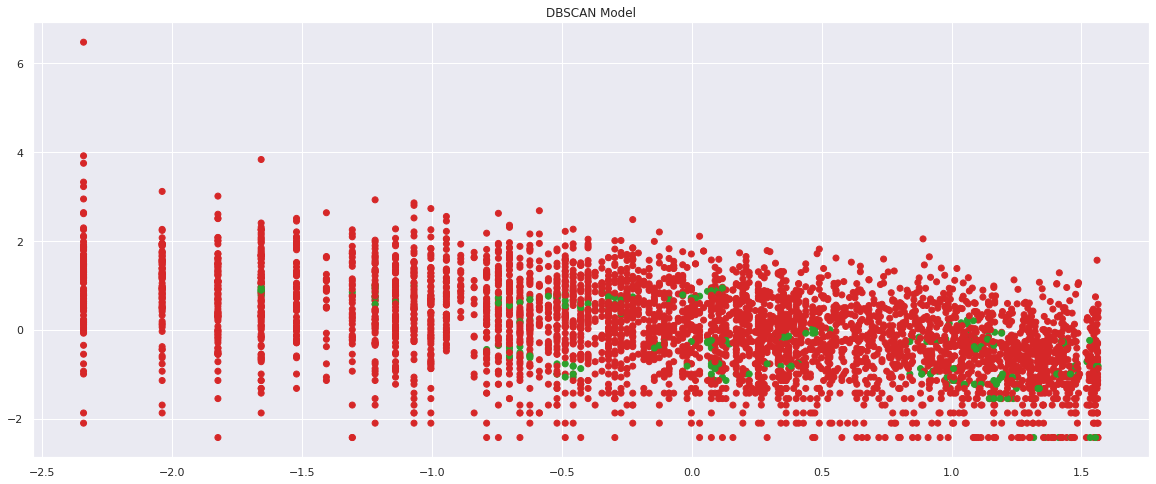

In [106]:
# Visualing inital DBSCAN Model
plt.figure(figsize=(20,8))
colors = ['tab:red','tab:green']
plt.scatter(X[:,0], X[:,1], c=y_Indbs, cmap=plott.colors.ListedColormap(colors))
plt.title('DBSCAN Model',fontsize=12)
plt.show()

#### <b> Hyperparameter Tuning

---
> Parameters which define the model architecture are referred to as hyperparameters and thus this process of searching for the ideal model architecture is referred to as hyperparameter tuning.
>* Hyperparameter tuning on DBSCAN to find optimal Epsilon and Minimum Samples

##### <b> Optimal Epsilon Identification

In [130]:
# Finding best Epsilon Value
ran_eps = [0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.3,1.4,1.5,2.0,2.3,2.8,3.0]
for i in ran_eps:
  print("Eps value is "+str(i))
  dbs = DBSCAN(eps=i, min_samples=5).fit(X)
  core_samples_mask = np.zeros_like(dbs.labels_,dtype=bool)
  core_samples_mask[dbs.core_sample_indices_]=True
  labels = dbs.labels_
  print(set(labels))
  silhouette_avg = silhouette_score(X , labels)
  print('For Eps value = '+str(i),labels,'\nTotal.no.of.cluster are '+str(len(set(labels))),'\nThe Average Silhouette Score is : ' ,silhouette_avg)

Eps value is 0.5
{0, -1}
For Eps value = 0.5 [-1  0  0 ...  0  0  0] 
Total.no.of.cluster are 2 
The Average Silhouette Score is :  0.47239547016346745
Eps value is 0.6
{0, -1}
For Eps value = 0.6 [-1  0  0 ...  0  0  0] 
Total.no.of.cluster are 2 
The Average Silhouette Score is :  0.5105475990211648
Eps value is 0.7
{0, -1}
For Eps value = 0.7 [-1  0  0 ...  0  0  0] 
Total.no.of.cluster are 2 
The Average Silhouette Score is :  0.5297250852687314
Eps value is 0.8
{0, -1}
For Eps value = 0.8 [-1  0  0 ...  0  0  0] 
Total.no.of.cluster are 2 
The Average Silhouette Score is :  0.5602696652285338
Eps value is 0.9
{0, -1}
For Eps value = 0.9 [-1  0  0 ...  0  0  0] 
Total.no.of.cluster are 2 
The Average Silhouette Score is :  0.57056027622254
Eps value is 1.0
{0, -1}
For Eps value = 1.0 [-1  0  0 ...  0  0  0] 
Total.no.of.cluster are 2 
The Average Silhouette Score is :  0.5768657902520733
Eps value is 1.1
{0, -1}
For Eps value = 1.1 [-1  0  0 ...  0  0  0] 
Total.no.of.cluster are 2

> * From the above observation the optimal Eps Value which we obtained is **2.0**. Above which almost there is no further deviation in silhouette score. For this observation purpose we had kept min_samples as **5**

##### <b> Optimal min_samples Identification

In [118]:
# Finding best Min_Samples parameter value
min_sam = range(1,11,1)
for i in min_sam:
  print('Minimum Sample Value is : '+str(i))
  dbs1 = DBSCAN(eps=2.0,min_samples=i).fit(X)
  core_samples_mask = np.zeros_like(dbs1.labels_,dtype=bool)
  core_samples_mask[dbs1.core_sample_indices_]=True
  labels = set([label for label in dbs1.labels_ if label >= 0])
  print(set(labels))
  print('For Minimum Samples value =',str(i),' ','Total.no.of.cluster are '+str(len(set(labels))))

Minimum Sample Value is : 1
{0, 1, 2}
For Minimum Samples value = 1   Total.no.of.cluster are 3
Minimum Sample Value is : 2
{0}
For Minimum Samples value = 2   Total.no.of.cluster are 1
Minimum Sample Value is : 3
{0}
For Minimum Samples value = 3   Total.no.of.cluster are 1
Minimum Sample Value is : 4
{0}
For Minimum Samples value = 4   Total.no.of.cluster are 1
Minimum Sample Value is : 5
{0}
For Minimum Samples value = 5   Total.no.of.cluster are 1
Minimum Sample Value is : 6
{0}
For Minimum Samples value = 6   Total.no.of.cluster are 1
Minimum Sample Value is : 7
{0}
For Minimum Samples value = 7   Total.no.of.cluster are 1
Minimum Sample Value is : 8
{0}
For Minimum Samples value = 8   Total.no.of.cluster are 1
Minimum Sample Value is : 9
{0}
For Minimum Samples value = 9   Total.no.of.cluster are 1
Minimum Sample Value is : 10
{0}
For Minimum Samples value = 10   Total.no.of.cluster are 1


> * From the above observation we could see that greater than 1 in min_samples have no change in number of clusters. So any value between **2 to 10** can be selected as min_samples. For convienent we choose **5**

#### <b> Final DBSCAN Modelling

---

> After hyperparameter tuning done on DBSCAN. The final modelling is implemented based on Optimal Epsilon and Minimum Samples

In [129]:
# Final DBSCAN Modelling
fin_dbs = DBSCAN(eps = 2.0, min_samples = 5)               # Model Initializing Phase
fin_dbs.fit(X)                                             # Model Traning Phase
y_findbs = fin_dbs.fit_predict(X)                          # Model Predicting Phase
print('Final DBSCAN Model implemented Successfully :)')
print('-----------------------------------------------------')
e = 2.0
ms = 5
FDBScluster = DBSCAN(eps=e,min_samples=ms)
FDBSpreds = FDBScluster.fit_predict(X)
FDBS_score = silhouette_score(X,FDBSpreds)
print("For Epsilon = {}, Minimum Sample = {} , silhouette score is {}".format(e, ms, FDBS_score))

Final DBSCAN Model implemented Successfully :)
-----------------------------------------------------
For Epsilon = 2.0, Minimum Sample = 5 , silhouette score is 0.6980677000733414


#### <b> Final DBSCAN Model Visualization

---

> Visualizing the Final DBSCAN Model

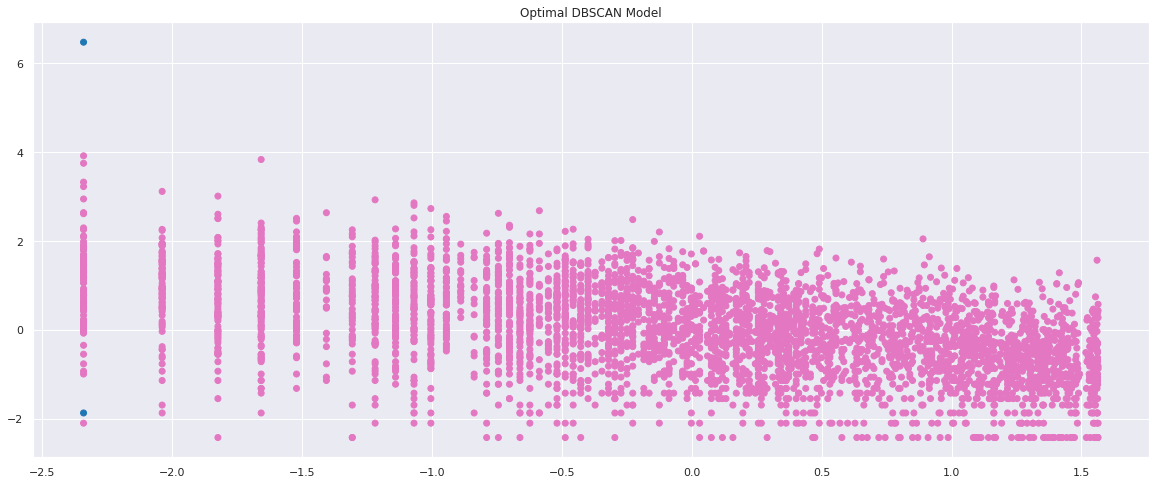

In [110]:
# Visualing Final DBSCAN Model
plt.figure(figsize=(20,8))
colors = ['tab:blue','tab:pink']
plt.scatter(X[:,0], X[:,1], c=y_findbs, cmap=plott.colors.ListedColormap(colors))
plt.title('Optimal DBSCAN Model',fontsize=12)
plt.show()

# <b> Result Comparison

---



In [140]:
# Comparing the results obtained from all the unsupervied ml models
result = PrettyTable(["S.No","Model_Name","Hyperparameter_Tuning",
                      "No.of.Clusters","Epsilon","Minimum_Samples","Silhoutte_Scores (-1 to 1)"])
result.add_row(['1','K-Means Clustering','No','5','-','-','0.2764'])
result.add_row(['2','Optimal K-Means Clustering','Yes','2','-','-','0.3996'])
result.add_row(['3','Agglometric Clustering','No','5','-','-','0.2166'])
result.add_row(['4','Optimal Agglometric Clustering','Yes','3','-','-','0.2535'])
result.add_row(['5','DBSCAN Clustering','No','2','0.1','5','-0.5341'])
result.add_row(['6','Optimal DBSCAN Clustering','Yes','1','2.0','5','0.6980'])

print(result)

+------+--------------------------------+--------------------------------+----------------+---------+-----------------+----------------------------+
| S.No |           Model_Name           | Hyperparameter_Tuning (Yes/No) | No.of.Clusters | Epsilon | Minimum_Samples | Silhoutte_Scores (-1 to 1) |
+------+--------------------------------+--------------------------------+----------------+---------+-----------------+----------------------------+
|  1   |       K-Means Clustering       |               No               |       5        |    -    |        -        |           0.2764           |
|  2   |   Optimal K-Means Clustering   |              Yes               |       2        |    -    |        -        |           0.3996           |
|  3   |     Agglometric Clustering     |               No               |       5        |    -    |        -        |           0.2166           |
|  4   | Optimal Agglometric Clustering |              Yes               |       3        |    -    |     

# <b> Conclusion & Recommendations

---
> Conclusion & Recommendations are made from above result tabular column.
>* For Online retail customer segmentation, I had implemented 3 clustering algorithms such as K-Means Clustering, Agglometric Clustering and DBSCAN Clustering.
>* Each clustering algorithms are of unique types.
>* K-Means Clustering algorithms are conventional type clustering and it works on distance based clustering.
>* Agglometric Clustering algorithms are hierarical type clustering and it works on bottom - up approach.
>* DBSCAN Clustering algorithms are density type clustering and it works on density of object based clustering.
>* Silhoutte Score is used as accessing the quality of the clustering model implemented in this notebook.
>* The Range for Silhoutte Score is between -1 to 1.
>* From the above Result Comparison tabulation. We can able to notice that hyperparameter tuning had helped to model to perform better.
>* The Model which has highest silhoutte score was "Optimal DBSCAN Clustering" but it lacks in effective clustering.
>* So the next highest value is for "Optimal K-Means Clustering".
>* I would suggest that Optimal K-Means Clustering model would perform well on Online Retail Customer Segmentation. 

----------------------------------------------- **End of Notebook** -----------------------------------------------
